# Job Market Analysis Project

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
import calendar
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
from datetime import date
import calendar

In [59]:
df = pd.read_csv("data_assignment.csv")

In [ ]:
df.Company.value_counts()

Jora Local                          4896
Hudson                               804
Design & Build                       701
Programmed Skilled Workforce         680
Robert Walters                       672
                                    ... 
Gateway Providores                     1
Pullman Resort Bunker Bay              1
ADVANCED EDUCATION GROUP PTY LTD       1
Macquarie University Hospital          1
RYLO Design Build Interiors            1
Name: Company, Length: 26318, dtype: int64

In [ ]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [61]:
df.shape

(149999, 13)

In [62]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [63]:
df.isnull().sum()

Id                       0
Title                    0
Company               5762
Date                     0
Location                 0
Area                 56503
Classification           0
SubClassification        0
Requirement              0
FullDescription       3282
LowestSalary             0
HighestSalary            0
JobType               3233
dtype: int64

# Data Analysis

### Scenario 1

In [64]:
'''
#Get cities in Queensland
data = pd.read_csv("CitiesQueensland.csv")

citiesQueensland = []
for c in data['Brisbane']:
  citiesQueensland.append(c)

citiesQueensland.append('Brisbane')
#citiesQueensland
'''

'\n#Get cities in Queensland\ndata = pd.read_csv("CitiesQueensland.csv")\n\ncitiesQueensland = []\nfor c in data[\'Brisbane\']:\n  citiesQueensland.append(c)\n\ncitiesQueensland.append(\'Brisbane\')\n#citiesQueensland\n'

In [65]:
citiesQueensland = ['Gold Coast–Tweed Heads (Gold Coast part)', 'Sunshine Coast', 'Townsville', 'Cairns', 'Toowoomba',
                    'Mackay', 'Rockhampton', 'Hervey Bay', 'Bundaberg', 'Gladstone', 'Maryborough', 'Mount Isa', 'Gympie',
                    'Nambour', 'Bongaree–Woorim', 'Yeppoon', 'Warwick', 'Emerald', 'Dalby', 'Bargara–Innes Park', 'Gracemere',
                    'Kingaroy', 'Tannum Sands–Boyne Island', 'Highfields', 'Airlie Beach', 'Sandstone Point - Ningi', 'Bowen',
                    'Moranbah', 'Ayr', 'Charters Towers', 'Mareeba', 'Tamborine Mountain', 'Innisfail', 'Atherton', 'Roma',
                    'Gatton', 'Gordonvale', 'Chinchilla', 'Beaudesert', 'Biloela', 'Mount Cotton', 'Jimboomba - West',
                    'Goondiwindi', 'Beerwah', 'Stanthorpe', 'Kensington Grove – Regency Downs', 'Blackwater', 'Emu Park',
                    'Ingham', 'Oakey', 'Port Douglas- Craiglie', 'Jimboomba', 'Palmwoods', 'Yarrabilba', 'Lowood', 'Weipa',
                    'Doonan - Tinbeerwah', 'Landsborough', 'Glass House Mountains', 'Laidley', 'Westbrook', 'Beachmere',
                    'Calliope', 'Proserpine', 'Nanango', 'Sarina', 'Walkerston', 'Charleville', 'Mooloolah', 'Pittsworth',
                    'Home Hill', 'Thursday Island', 'Woodford', 'Cooroy', 'Russell Island', 'Maleny', 'Fernvale', 'Longreach',
                    'Boonah', 'Macleay Island', 'Burnett Heads', 'Cooloola Village', 'Yarrabah', 'Cedar Vale', 'Logan Village', 'Palm Island', 'Dysart', 'Mount Morgan', 'St George', 'Marian', 'Rosewood',
                    'Meringandan West', 'Cloncurry', 'Kuranda', 'Tin Can Bay', 'Tully', 'Samford Valley - Highvale', 'Alice River',
                    'Moore Park', 'Toogoom', 'Murgon', 'Clermont', 'Oakhurst', 'Gowrie Junction', 'Cedar Grove', 'Dayboro', 'Kilcoy', 'Yandina', 'Hamilton Island', 'Cooroibah', 'Middlemount', 'Wondai', 'Glenview', 'Jacobs Well', 'Mossman', 'Curra', 'Cooktown', 'Pomona', 'Gayndah', 'Crows Nest', 'Kooralbyn', 'Malanda', 'Kingsthorpe', 'Withcott', 'River Heads', 'Moura', 'Glenwood', 'Wyreema', 'Doomadgee', 'Meridan Plains', 'Millmerran', 'Hay Point', 'Gleneagle', 'Childers', 'Barcaldine', 'Willowbank', 'Tolga - West', 'Aurukun', 'Cherbourg', 'Esk', 'Burrum Heads', 'Plainland', 'Cardwell', 'Clifton', 'Wongaling Beach', 'Walloon', 'Rainbow Beach', 'Normanton', 'Laidley Heights', 'Jandowae', 'Allingham', 'Nelly Bay', 'Bamaga', 'Mundubbera', 'Bakers Creek', 'Cambooya', 'Gununa', 'Miles', 'Tieri', 'Collinsville', 'Woodgate', 'Kiels Mountain', 'Blackall', 'Howard', 'Hughenden', 'Yungaburra', 'Mulambin', 'Monto', 'Toogoolawah', 'Cunnamulla', 'Rangewood', 'Capella', 'D’Aguilar', 'Mirani', 'The Palms', 'Eumundi', 'Tolga', 'Bluewater Park', 'Balgal Beach', 'Woorabinda', 'Babinda', 'Cooran', 'Napranum', 'Sunshine Acres', 'Kowanyama', 'Mundoolun', 'Flaxton', 'Blue Mountain Heights', 'Mapleton', 'South Mission Beach', 'Herberton', 'Kureelpa', 'Agnes Water', 'Goldsborough', 'Belvedere', 'Black River', 'Dunwich', 'Winton', 'Yarraman', 'Gin Gin', 'Springsure', 'Witta', 'Ravenshoe', 'Hope Vale', 'Elliott Heads', 'Allora', 'Benaraby', 'Minden Village', 'Wonga Beach', 'Badu Island', 'Mission Beach', 'Tara', 'Lower Beechmont', 'Kalbar', 'Mitchell', 'Samford Village', 'Canungra', 'Delaneys Creek', 'Inglewood', 'Goombungee', 'Coochiemudlo Island', 'Pacific Haven', 'Booral', 'Helidon', 'Black Mountain', 'Texas', 'Bouldercombe', 'Brandon', 'Killarney', 'Point Lookout', 'Thagoona', 'Deebing Heights', 'Biggenden', 'Armstrong Beach', 'Pormpuraaw', 'Bluewater', 'Lockhart River', 'Sharon', 'Toorbul', 'Forest Acres', 'Rubyvale', 'Boyland', 'Yabulu', 'Blackbutt', 'Kinka Beach', 'Kurrimine Beach', 'Coominya', 'Marburg', 'Wangan', 'Glenden', 'Aldershot', 'Horseshoe Bay', 'Sloping Hummock', 'Gooburrum', 'Prince Henry Heights', 'Sapphire', 'Glenore Grove', 'Quilpie',
                    'Nome', 'Glendale', 'Injinoo', 'Pie Creek', 'Beechmont', 'Cooya Beach', 'Taroom', 'Horn Island', 'Mareeba - South',
                    'Karumba', 'Apple Tree Creek', 'Campwin Beach', 'Nebo', 'Goomeri', 'Greenmount', 'Brisbane'] #'Richmond'

In [66]:
#dfQueensland.to_csv("Queensland_dataset.csv")

In [67]:
dfQueensland = pd.DataFrame()

for city in citiesQueensland:
  dfQueensland = dfQueensland.append(df[df["Location"].str.contains(city)])

#dfQueensland

In [68]:
dfQueensland.Location.value_counts()

Brisbane                         16538
Mackay & Coalfields               1316
Sunshine Coast                    1188
Cairns & Far North                1177
Toowoomba & Darling Downs          986
Rockhampton & Capricorn Coast      535
Gladstone & Central QLD            524
Bundaberg & Wide Bay Burnett       289
Hervey Bay & Fraser Coast          217
Name: Location, dtype: int64

In [69]:
# Get Locations in Queensland that are having jobs with salary >= 80K

salMoreThan80k = dfQueensland[dfQueensland["LowestSalary"] >= 80]
print(salMoreThan80k.shape)
#salMoreThan80k.to_csv("salMoreThan80k.csv")
salMoreThan80k.head()

(7417, 13)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
14854,37396420,Business Manager,Pacific Motor Group,2018-10-04T00:00:00.000Z,Sunshine Coast,NaN,Sales,Sales Representatives/Consultants,Finance & Insurance Manager - Sunshine Coast. ...,<p> </p>\n <p><strong>About the busines...,80,100,Full Time
14913,37395973,Sales Manager,BMW Dealer Careers,2018-10-04T00:00:00.000Z,Sunshine Coast,NaN,Sales,Management,A diverse Sales Manager role that will see an ...,BMW is renowned not only for its premium produ...,80,100,Full Time
15120,37394323,"Teachers - Junior, Middle and Senior Years ( P...",Good Shepherd Lutheran College,2018-10-04T00:00:00.000Z,Sunshine Coast,NaN,Education & Training,Teaching - Secondary,Equivalent of 3 to 4 Full-time permanent posit...,"<p>Due to staff movement, continued enrolment ...",80,100,Full Time
15283,37392994,Crane Operators (C6) & Riggers (RI) | Structu...,Celotti Workforce,2018-10-04T00:00:00.000Z,Sunshine Coast,NaN,Construction,Plant & Machinery Operators,Our client is currently seeking experienced C6...,<strong>About the Role:<br></strong>Our client...,80,100,Full Time
15410,37392061,Clinical Manager - Caloundra,Bolton Clarke,2018-10-04T00:00:00.000Z,Sunshine Coast,NaN,Healthcare & Medical,Nursing - Aged Care,Use your strong people and clinical management...,<strong><em>About the Facility&nbsp;<br><br>Bo...,80,100,Full Time


---
### Job-Type Distribution

In [70]:
salMoreThan80k.JobType.value_counts()

Full Time          5022
Contract/Temp      1832
Casual/Vacation     213
Part Time           135
Name: JobType, dtype: int64

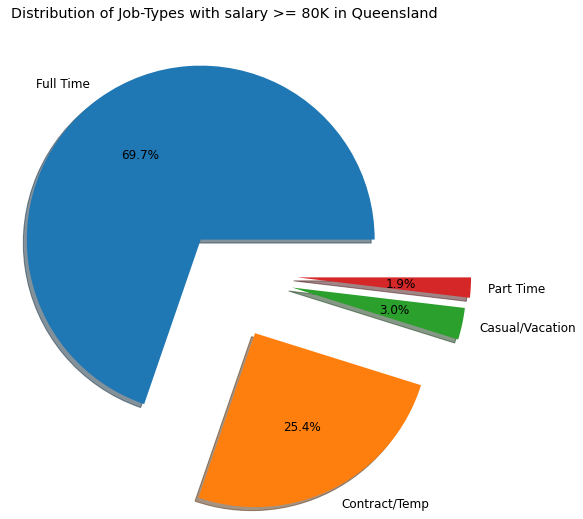

In [71]:
df_JobType = dfQueensland[dfQueensland["LowestSalary"] >= 80]
s = df_JobType.JobType.value_counts()
occurrences = s.values
labels =  s.index #add ['Full Time', 'Contract/Temp', 'Casual/Vacation', 'Part Time']

sampl = np.random.uniform(low=0.2, high=0.5, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8)) 
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True) #if raising error, add 'Others' after 'Contract/Temp' in labels
plt.title("Distribution of Job-Types with salary >= 80K in Queensland\n\n")
#plt.savefig('Distribution of Job-Types.png')
#plt.rcParams['axes.facecolor'] = 'white'
plt.show()

- For job-security purpose, Tom should consider Full Time job-type because that will be more stable as compared to other job-types

In [72]:
#Get only Full-Time jobs with a salary >= 80K in Queensland

salMoreThan80k = dfQueensland[(dfQueensland["JobType"] == 'Full Time') & (dfQueensland["LowestSalary"] >= 80)]
print(salMoreThan80k.shape)

(5022, 13)


- For job-security purpose, Tom should consider Full Time job-type because that will be more stable as compared to other job-types
- There are total 5036 Full Time jobs with salary >= 80K in Queensland

### Preprocessing Data

1. Replacing NaN with empty string

In [73]:
#Replacing NaN with empty string

salMoreThan80k = salMoreThan80k.replace(np.nan, '', regex=True)

2. Removing tags from text columns such as FullDescription, Requirement

In [74]:
#Removing tags from text columns such as FullDescription, Requirement

salMoreThan80k["FullDescription"] = [BeautifulSoup(text).get_text() for text in salMoreThan80k["FullDescription"] ]
salMoreThan80k["Requirement"] = [BeautifulSoup(text).get_text() for text in salMoreThan80k["Requirement"]]

### Distribution of full-time jobs with salary >= 80K in Queensland

In [75]:
salMoreThan80k.LowestSalary.value_counts()

100    1483
80     1300
120    1043
150     845
200     351
Name: LowestSalary, dtype: int64

### NEW- Lowest Salary distribution with minimum salary

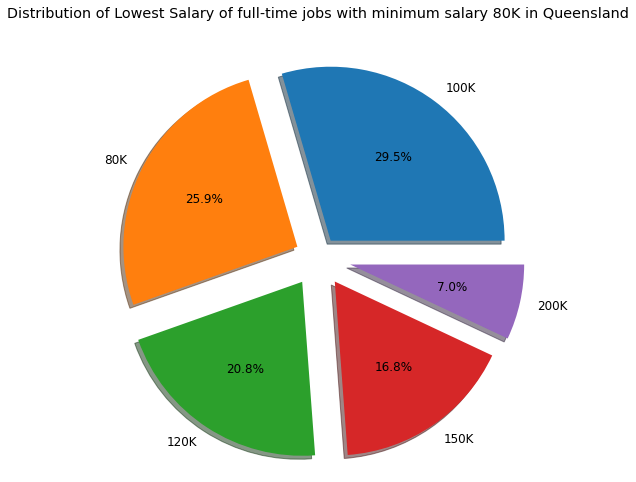

In [76]:
# Lowest Salary distribution with minimum salary of 80K
s = salMoreThan80k.LowestSalary.value_counts()
occurrences = s.values
labels = ['100K', '80K', '120K', '150K', '200K']

sampl = np.random.uniform(low=0.1, high=0.2, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8))
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Distribution of Lowest Salary of full-time jobs with minimum salary 80K in Queensland\n")
#plt.savefig('Distribution Of Lowest Salary.png')
plt.show()

In [77]:
salMoreThan80k.LowestSalary.mean()

114.37873357228196

- Jobs with lowest salary 100K make upto 29.5% of all jobs with salary >= 80K in Queensland
- Jobs with lowest salary 80K make upto 25.9% of all jobs with salary >= 80K in Queensland
- Jobs with lowest salary 200K make upto 7% of all jobs with salary >= 80K in Queensland
- Average lowest salary is: 114.37K

### NEW- Highest Salary distribution with minimum salary

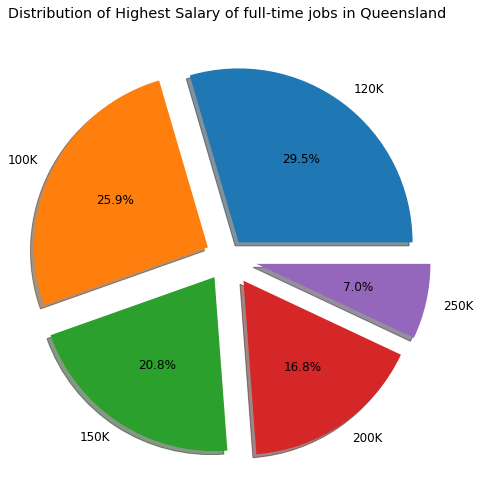

In [78]:
# Highest Salary distribution with minimum salary

s = salMoreThan80k.HighestSalary.value_counts()
occurrences = s.values
labels = ['120K', '100K', '150K', '200K', '250K']

sampl = np.random.uniform(low=0.1, high=0.2, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8))
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Distribution of Highest Salary of full-time jobs in Queensland\n")
#plt.savefig('Distribution Of Highest Salary.png')
plt.show()

In [79]:
salMoreThan80k.HighestSalary.mean()

143.60015929908403

- Jobs with highest salary 120K make upto 29.5% of all the highest paying jobs with in Queensland
- Jobs with highest salary 100K make upto 25.9% of all the highest paying jobs in Queensland
- Jobs with highest salary 200K make upto 7% of allthe highest paying jobs in Queensland

- The highest salary is: 250K
- Average highest salary is: 143.60K

In [80]:
avgSal = salMoreThan80k.HighestSalary.mean() + salMoreThan80k.LowestSalary.mean()
print(avgSal/2)

128.989446435683


- The average salary of all the jobs with salary>= 80K in Queensland is 128.98K

### Distribution of location of full-time jobs with salary >= 80K in Queensland

In [81]:
salMoreThan80k.Location.value_counts()

Brisbane                         3819
Mackay & Coalfields               395
Cairns & Far North                175
Toowoomba & Darling Downs         144
Gladstone & Central QLD           140
Rockhampton & Capricorn Coast     133
Sunshine Coast                    132
Bundaberg & Wide Bay Burnett       53
Hervey Bay & Fraser Coast          31
Name: Location, dtype: int64

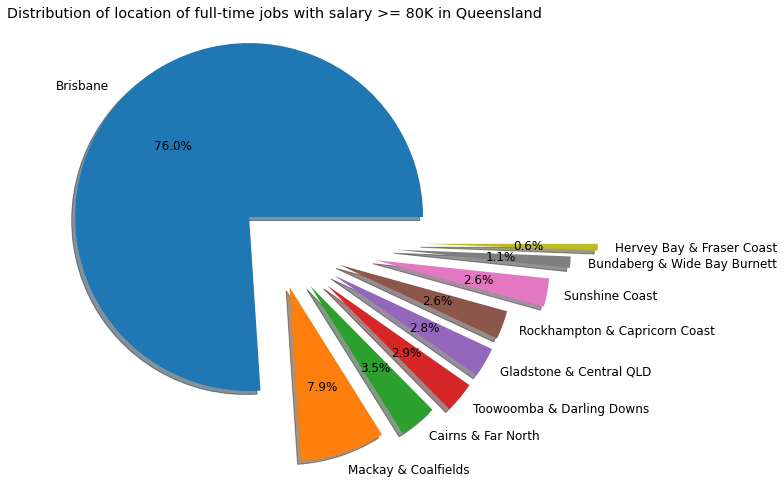

In [82]:
s = salMoreThan80k.Location.value_counts()
occurrences = s.values
labels = s.index
sampl = np.random.uniform(low=0, high=1.2, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8)) 
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Distribution of location of full-time jobs with salary >= 80K in Queensland")
#plt.savefig('Location wise distribution of jobs.png')
#plt.rcParams['axes.facecolor'] = 'white'
plt.show()

- Tom should consider the following locations in Queensland having full-time jobs with salary >= 80K:
  - Brisbane
  - Mackay & Coalfields
  - Sunshine Coast
  - Cairns & Far North
  - Toowoomba & Darling Downs
  - Rockhampton & Capricorn Coast
  - Gladstone & Central QLD
  - Bundaberg & Wide Bay Burnett
  - Hervey Bay & Fraser Coast

- The lowest salary in these locations is: 80K
- The highest salary in these locations is: 200K
- Average salary in these locations is: 114.34K

---
### Job-Sector Distribution

In [83]:
salMoreThan80k.Classification.value_counts()

Information & Communication Technology    623
Healthcare & Medical                      585
Mining, Resources & Energy                520
Engineering                               470
Construction                              412
Government & Defence                      384
Legal                                     258
Sales                                     237
Education & Training                      232
Accounting                                218
Trades & Services                         175
Manufacturing, Transport & Logistics      169
Human Resources & Recruitment             115
Banking & Financial Services              106
Marketing & Communications                 75
CEO & General Management                   62
Real Estate & Property                     56
Insurance & Superannuation                 48
Consulting & Strategy                      42
Community Services & Development           40
Hospitality & Tourism                      39
Science & Technology              

In [84]:
'''
s = salMoreThan80k.Classification.value_counts()
total = len(s)
my_colors = 'rgba'
ax=s.plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                             'C9', 'C10', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18']) 
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.set_yticklabels(map('{:.1f}%'.format, ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Job-Sectors") 
plt.ylabel("Percentage share") 
plt.title("Distribution Of Job-Sectors having jobs with salary >= 80K in Queensland")
plt.rcParams['font.size'] = 10
plt.xticks(rotation=82)
plt.rcParams["figure.figsize"] = (12,6)
#plt.savefig('Distribution Of Job-Sector.png')
'''

'\ns = salMoreThan80k.Classification.value_counts()\ntotal = len(s)\nmy_colors = \'rgba\'\nax=s.plot(kind=\'bar\', color=[\'C0\', \'C1\', \'C2\', \'C3\', \'C4\', \'C5\', \'C6\', \'C7\', \'C8\',\n                             \'C9\', \'C10\', \'C12\', \'C13\', \'C14\', \'C15\', \'C16\', \'C17\', \'C18\']) \nfor p in ax.patches:\n    ax.annotate(\'{:.1f}%\'.format(p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))\n\nax.set_yticklabels(map(\'{:.1f}%\'.format, ax.yaxis.get_majorticklocs()/total))\nplt.xlabel("Job-Sectors") \nplt.ylabel("Percentage share") \nplt.title("Distribution Of Job-Sectors having jobs with salary >= 80K in Queensland")\nplt.rcParams[\'font.size\'] = 10\nplt.xticks(rotation=82)\nplt.rcParams["figure.figsize"] = (12,6)\n#plt.savefig(\'Distribution Of Job-Sector.png\')\n'

Text(0.5, 1.0, 'Distribution of Job-Sectors having full-time jobs with salary >= 80K in Queensland\n')

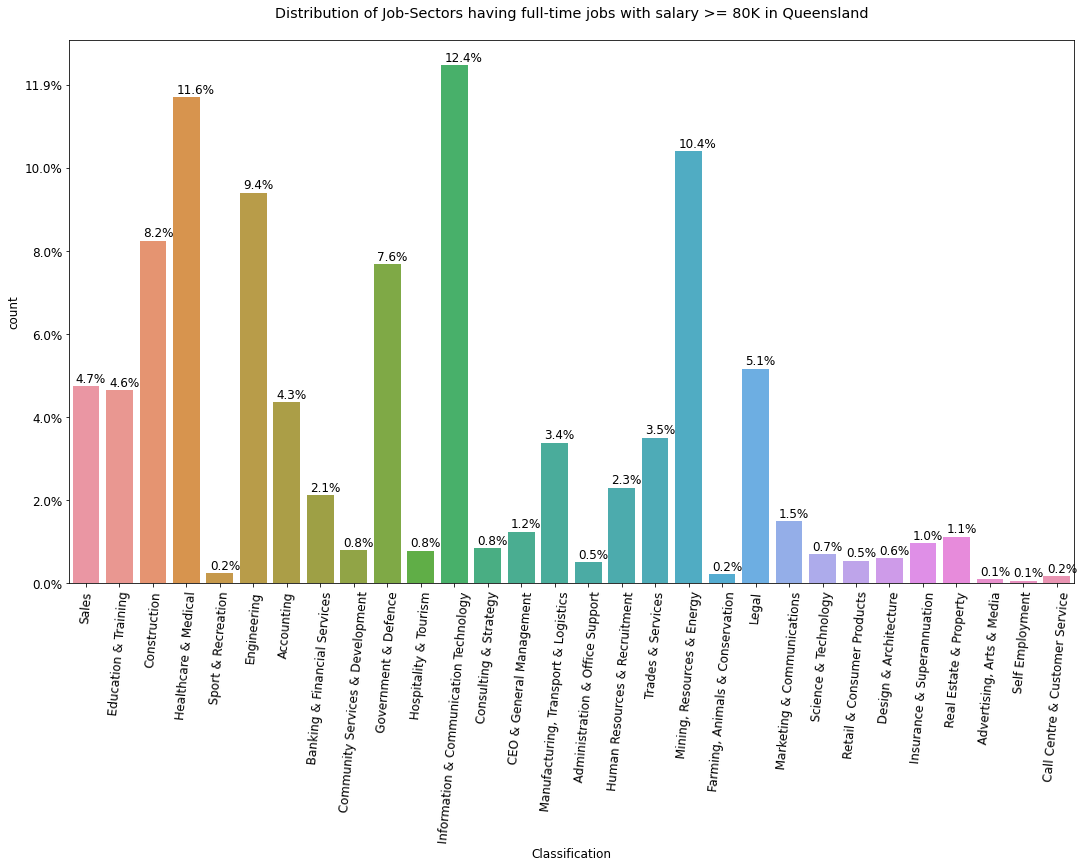

In [138]:

total = len(salMoreThan80k)*1.
ax=sns.countplot(x="Classification", data=salMoreThan80k)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of Job-Sectors having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution Of Job-Sector.png')

In [86]:
# Get the top 10 sectors from the above plot(Distribution of Job-Sectors having full-time jobs with salary >= 80K in Queensland)
for x in salMoreThan80k.Classification.value_counts().index[:10]:
  print('-',x)

- Information & Communication Technology
- Healthcare & Medical
- Mining, Resources & Energy
- Engineering
- Construction
- Government & Defence
- Legal
- Sales
- Education & Training
- Accounting


In [87]:
# Get the lowest 10 sectors from the above plot(Distribution of Job-Sectors having full-time jobs with salary >= 80K in Queensland)
for x in salMoreThan80k.Classification.value_counts().index[-10:]:
  print('-',x)

- Hospitality & Tourism
- Science & Technology
- Design & Architecture
- Retail & Consumer Products
- Administration & Office Support
- Sport & Recreation
- Farming, Animals & Conservation
- Call Centre & Customer Service
- Advertising, Arts & Media
- Self Employment


- The following job-sectors (in decreasing job-share percentage) have jobs with salary >= 80K in Queesnland:
  - Information & Communication Technology
  - Healthcare & Medical
  - Mining, Resources & Energy
  - Engineering
  - Construction
  - Government & Defence
  - Legal
  - Sales
  - Education & Training
  - Accounting
  - Trades & Services
  - Manufacturing, Transport & Logistics
  - Human Resources & Recruitment
  - Banking & Financial Services
  - Marketing & Communications
  - CEO & General Management
  - Real Estate & Property
  - Insurance & Superannuation
  - Consulting & Strategy
  - Community Services & Development
  - Hospitality & Tourism
  - Science & Technology
  - Design & Architecture
  - Retail & Consumer Products
  - Administration & Office Support
  - Sport & Recreation
  - Farming, Animals & Conservation
  - Call Centre & Customer Service
  - Advertising, Arts & Media
  - Self Employment

- Tom should consider having a major and related subjects to the  following job-sectors that contribute more than 60% jobs with salary >= 80K in Queensland:
  - Information & Communication Technology
  - Healthcare & Medical
  - Mining, Resources & Energy
  - Engineering
  - Construction
  - Government & Defence

### NEW- Finding out sub classification in these Top classifications that constitute the highest paid sub classifications

In [88]:
salMoreThan80k.HighestSalary.value_counts()

120    1483
100    1300
150    1043
200     845
250     351
Name: HighestSalary, dtype: int64

In [89]:
topClassifications = salMoreThan80k.Classification.value_counts().index[:6]

Index(['Information & Communication Technology', 'Healthcare & Medical',
       'Mining, Resources & Energy', 'Engineering', 'Construction',
       'Government & Defence'],
      dtype='object')

In [ ]:

# Get the highest paying subClassifications in the top 5 Classifications

df_subClassHighestSal = pd.DataFrame(columns=['Classification', 'SubClassification', 'HighestSalary'])

for x in topClassifications:
  df_top = salMoreThan80k[salMoreThan80k['Classification'] == x]
  for i in set(df_top.SubClassification.values):
    df_subClass = df_top[df_top['SubClassification'] == i]
    df_highestSal = df_subClass.iloc[df_subClass['HighestSalary'].argmax()]
    df_subClassHighestSal = df_subClassHighestSal.append({'Classification':x, 'SubClassification':i,
                                                          'HighestSalary':df_highestSal.HighestSalary},
                                                         ignore_index = True)

In [137]:
df_subClassHighestSal.head(50) #put an integer in head(integer_here) to see as many rows as you want to see upto 104 only.

,Classification,SubClassification,HighestSalary
0,Information & Communication Technology,Management,250
1,Information & Communication Technology,Business/Systems Analysts,250
2,Information & Communication Technology,Other,200
3,Information & Communication Technology,Product Management & Development,250
4,Information & Communication Technology,Security,200
5,Information & Communication Technology,Database Development & Administration,250
6,Information & Communication Technology,Sales - Pre & Post,250
7,Information & Communication Technology,Web Development & Production,120
8,Information & Communication Technology,Telecommunications,150
9,Information & Communication Technology,Engineering - Hardware,120


In [131]:
df_subClassHighestSal.Classification.value_counts()

Healthcare & Medical                      29
Information & Communication Technology    20
Engineering                               19
Mining, Resources & Energy                16
Construction                              11
Government & Defence                       9
Name: Classification, dtype: int64

In [134]:
df_subClassHighestSal.HighestSalary.value_counts()

250    42
200    35
150    15
120    11
100     1
Name: HighestSalary, dtype: int64

### NEW- Get the list of subClassifications in the Top 5 Classifications

In [165]:

# Get the list of subClassifications in the Top 5 Classifications

df_subClassBottomClass = pd.DataFrame()

for x in topClassifications:
  df_top = salMoreThan80k[salMoreThan80k['Classification'] == x]
  for i in set(df_top.SubClassification.values):
    df_subClass = df_top[df_top['SubClassification'] == i]
    df_highestSal = df_subClass.iloc[df_subClass['HighestSalary'].argmax()]
    df_subClassBottomClass = df_subClassBottomClass.append({x:i,},
                                                         ignore_index = True)

df_subClassBottomClass = df_subClassBottomClass.replace(np.nan, '', regex=True)

In [171]:
df_subClassBottomClass.tail(50) #put an integer in head(integer_here) to see as many rows as you want to see upto 104 only.

,Information & Communication Technology,Healthcare & Medical,"Mining, Resources & Energy",Engineering,Construction,Government & Defence
54,,,Surveying,,,
55,,,Oil & Gas - Drilling,,,
56,,,Mining - Drill & Blast,,,
57,,,Oil & Gas - Exploration & Geoscience,,,
58,,,Analysis & Reporting,,,
59,,,Mining - Operations,,,
60,,,Power Generation & Distribution,,,
61,,,Natural Resources & Water,,,
62,,,Oil & Gas - Engineering & Maintenance,,,
63,,,"Health, Safety & Environment",,,


In [169]:
df_subClassBottomClass["Information & Communication Technology"][:19]

0                                Management
1                 Business/Systems Analysts
2                                     Other
3          Product Management & Development
4                                  Security
5     Database Development & Administration
6                        Sales - Pre & Post
7              Web Development & Production
8                        Telecommunications
9                    Engineering - Hardware
10                    Engineering - Network
11        Networks & Systems Administration
12                   Developers/Programmers
13                   Engineering - Software
14                             Team Leaders
15                              Consultants
16           Programme & Project Management
17                   Help Desk & IT Support
18                               Architects
Name: Information & Communication Technology, dtype: object

In [170]:
df_subClassBottomClass["Healthcare & Medical"][20:48]

20                                           Pharmacy
21                                Medical Specialists
22               Nursing - General Medical & Surgical
23                 Physiotherapy, OT & Rehabilitation
24                                            Optical
25                                         Management
26                             Medical Administration
27                                Nursing - Aged Care
28                       Nursing - Theatre & Recovery
29                        Nursing - Paediatric & PICU
30                          Clinical/Medical Research
31                                              Other
32                 Nursing - Educators & Facilitators
33                               Ambulance/Paramedics
34         Nursing - Midwifery, Neo-Natal, SCN & NICU
35                             Residents & Registrars
36                         Chiropractic & Osteopathic
37    Nursing - Psych, Forensic & Correctional Health
38                 Nursing -

In [172]:
df_subClassBottomClass["Mining, Resources & Energy"][49:64]

49                               Management
50        Mining - Exploration & Geoscience
51                      Mining - Processing
52                   Oil & Gas - Operations
53                                    Other
54                                Surveying
55                     Oil & Gas - Drilling
56                   Mining - Drill & Blast
57     Oil & Gas - Exploration & Geoscience
58                     Analysis & Reporting
59                      Mining - Operations
60          Power Generation & Distribution
61                Natural Resources & Water
62    Oil & Gas - Engineering & Maintenance
63             Health, Safety & Environment
Name: Mining, Resources & Energy, dtype: object

In [173]:
df_subClassBottomClass["Engineering"][65:83]

65                           Management
66         Civil/Structural Engineering
67                 Engineering Drafting
68                   Project Management
69                  Process Engineering
70                                Other
71                 Chemical Engineering
72        Building Services Engineering
73    Electrical/Electronic Engineering
74               Mechanical Engineering
75            Environmental Engineering
76                  Project Engineering
77            Water & Waste Engineering
78                    Field Engineering
79               Industrial Engineering
80                  Systems Engineering
81                Aerospace Engineering
82       Materials Handling Engineering
Name: Engineering, dtype: object

In [174]:
df_subClassBottomClass["Construction"][84:94]

84                     Management
85             Project Management
86                          Other
87         Foreperson/Supervisors
88                     Estimating
89                      Surveying
90          Planning & Scheduling
91    Plant & Machinery Operators
92    Quality Assurance & Control
93           Contracts Management
Name: Construction, dtype: object

In [175]:
df_subClassBottomClass["Government & Defence"][95:103]

95                         Air Force
96                Emergency Services
97                             Other
98              Police & Corrections
99                Government - State
100    Policy, Planning & Regulation
101                       Government
102             Government - Federal
Name: Government & Defence, dtype: object

### NEW- Finding out sub classifications in Bottom classifications that constitute the highest paid sub classifications

In [154]:
bottomClassifications = salMoreThan80k.Classification.value_counts().index[-5:]
bottomClassifications

Index(['Sport & Recreation', 'Farming, Animals & Conservation',
       'Call Centre & Customer Service', 'Advertising, Arts & Media',
       'Self Employment'],
      dtype='object')

In [155]:

# Get the highest paying subClassifications in the Bottom 5 Classifications

df_subClassHighestSal = pd.DataFrame(columns=['Classification', 'SubClassification', 'HighestSalary'])

for x in bottomClassifications:
  df_top = salMoreThan80k[salMoreThan80k['Classification'] == x]
  for i in set(df_top.SubClassification.values):
    df_subClass = df_top[df_top['SubClassification'] == i]
    df_highestSal = df_subClass.iloc[df_subClass['HighestSalary'].argmax()]
    df_subClassHighestSal = df_subClassHighestSal.append({'Classification':x, 'SubClassification':i,
                                                          'HighestSalary':df_highestSal.HighestSalary},
                                                         ignore_index = True)

In [156]:
df_subClassHighestSal.shape

(14, 3)

In [157]:
df_subClassHighestSal.head(14) #put an integer in head(integer_here) to see as many rows as you want to see upto 14 only.

,Classification,SubClassification,HighestSalary
0,Sport & Recreation,Fitness & Personal Training,150
1,"Farming, Animals & Conservation",Agronomy & Farm Services,100
2,"Farming, Animals & Conservation",Fishing & Aquaculture,200
3,"Farming, Animals & Conservation",Horticulture,150
4,"Farming, Animals & Conservation",Farm Management,150
5,Call Centre & Customer Service,Sales - Outbound,200
6,Call Centre & Customer Service,Supervisors/Team Leaders,120
7,Call Centre & Customer Service,Other,120
8,Call Centre & Customer Service,Management & Support,120
9,"Advertising, Arts & Media",Management,200


### NEW- Get the list of subClassifications in the Bottom 5 Classifications

In [161]:

# Get the list of subClassifications in the Bottom 5 Classifications

df_subClassBottomClass = pd.DataFrame()

for x in bottomClassifications:
  df_top = salMoreThan80k[salMoreThan80k['Classification'] == x]
  for i in set(df_top.SubClassification.values):
    df_subClass = df_top[df_top['SubClassification'] == i]
    df_highestSal = df_subClass.iloc[df_subClass['HighestSalary'].argmax()]
    df_subClassBottomClass = df_subClassBottomClass.append({x:i,},
                                                         ignore_index = True)

df_subClassBottomClass = df_subClassBottomClass.replace(np.nan, '', regex=True)

In [164]:
df_subClassBottomClass

,Sport & Recreation,"Farming, Animals & Conservation",Call Centre & Customer Service,"Advertising, Arts & Media",Self Employment
0,Fitness & Personal Training,,,,
1,,Agronomy & Farm Services,,,
2,,Fishing & Aquaculture,,,
3,,Horticulture,,,
4,,Farm Management,,,
5,,,Sales - Outbound,,
6,,,Supervisors/Team Leaders,,
7,,,Other,,
8,,,Management & Support,,
9,,,,Management,


---
### Job-Role Distribution

In [93]:
salMoreThan80k.SubClassification.value_counts()[:20] #Top 20 job-roles

Management                            330
Other                                 294
Government - State                    272
Mining - Engineering & Maintenance    182
Project Management                    172
Civil/Structural Engineering          138
General Practitioners                 129
Mining - Operations                   111
Developers/Programmers                111
Foreperson/Supervisors                 69
New Business Development               68
Sales Representatives/Consultants      68
Account & Relationship Management      67
Medical Specialists                    63
Estimating                             63
Contracts Management                   59
Engineering - Software                 55
Networks & Systems Administration      51
Health, Safety & Environment           50
Nursing - Aged Care                    49
Name: SubClassification, dtype: int64

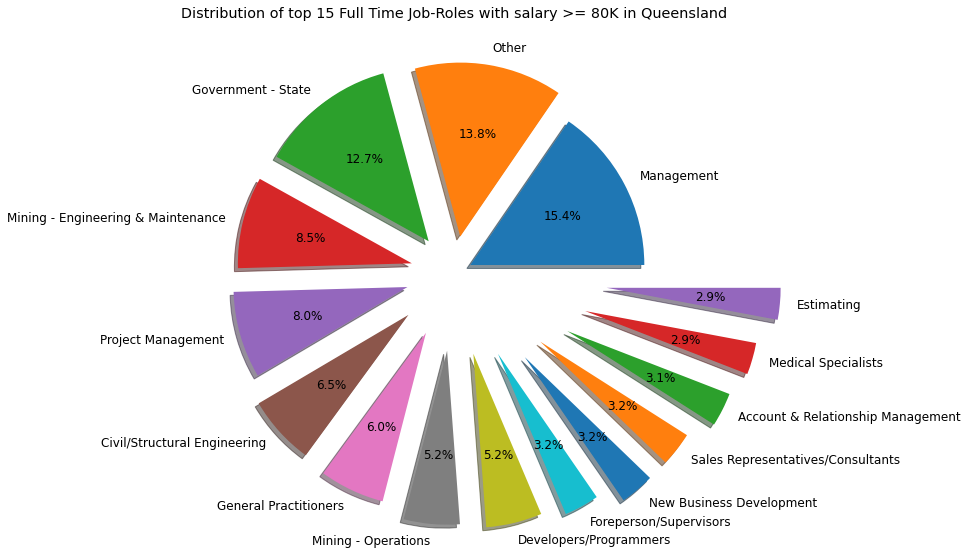

In [94]:
#Distribution of top 15 Full Time Job-Roles with salary >= 80K in Queensland

s = salMoreThan80k.SubClassification.value_counts()[:15]
occurrences = s.values
labels = s.index

sampl = np.random.uniform(low=0, high=0.9, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8)) 
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Distribution of top 15 Full Time Job-Roles with salary >= 80K in Queensland\n\n")
#plt.savefig('Distribution of top 15 Job-Roles.png')
#plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [95]:
df_otherRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Other']
df_otherRolesClass.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
59766,37493130,Audiologist/Audiometrist Kawana Waters QLD,Bay Audio Pty Ltd,2018-10-17T00:00:00.000Z,Sunshine Coast,,Healthcare & Medical,Other,Bay Audio has a fantastic opportunity for a mo...,Audiologist/Audiometrist – Kawana Waters QLD\n...,100,120,Full Time
65847,37471096,Regional Project Director,Davidson Executive,2018-10-15T00:00:00.000Z,Sunshine Coast,,CEO & General Management,Other,The Regional Project Director will play an int...,About the OrganisationThe Program Delivery and...,200,250,Full Time
81125,37506337,GIS / Data Scientist,Sunshine Coast Council,2018-10-18T00:00:00.000Z,Sunshine Coast,,Information & Communication Technology,Other,The perfect opportunity to grow in your career...,$82k –$88k pa gross (plus benefits) \nPermane...,80,100,Full Time
106663,37584377,Mental Health Dual Diagnosis Coordinator,Sunshine Coast Hospital and Health Service,2018-10-29T00:00:00.000Z,Sunshine Coast,,Healthcare & Medical,Other,Further your career. Modern well equipped faci...,An exciting opportunity exists for a Mental He...,100,120,Full Time
111848,37554948,Design Manager,Stellar Recruitment,2018-10-25T00:00:00.000Z,Sunshine Coast,,Construction,Other,"Outstanding opportunity for a talented, result...",Design Manager - Sunshine Coast\n\nLeading Nat...,150,200,Full Time


In [96]:
df_otherRolesClass.Classification.value_counts()

Education & Training                      87
Mining, Resources & Energy                33
Information & Communication Technology    30
Healthcare & Medical                      25
Engineering                               18
Construction                              17
Trades & Services                         13
Legal                                     13
Administration & Office Support            7
Consulting & Strategy                      7
Government & Defence                       6
Manufacturing, Transport & Logistics       5
CEO & General Management                   5
Banking & Financial Services               5
Accounting                                 4
Design & Architecture                      4
Insurance & Superannuation                 3
Sales                                      2
Real Estate & Property                     2
Science & Technology                       2
Marketing & Communications                 2
Retail & Consumer Products                 1
Hospitalit

Text(0.5, 1.0, 'Distribution of various sectors having job roles as Others and having full-time jobs with salary >= 80K in Queensland\n')

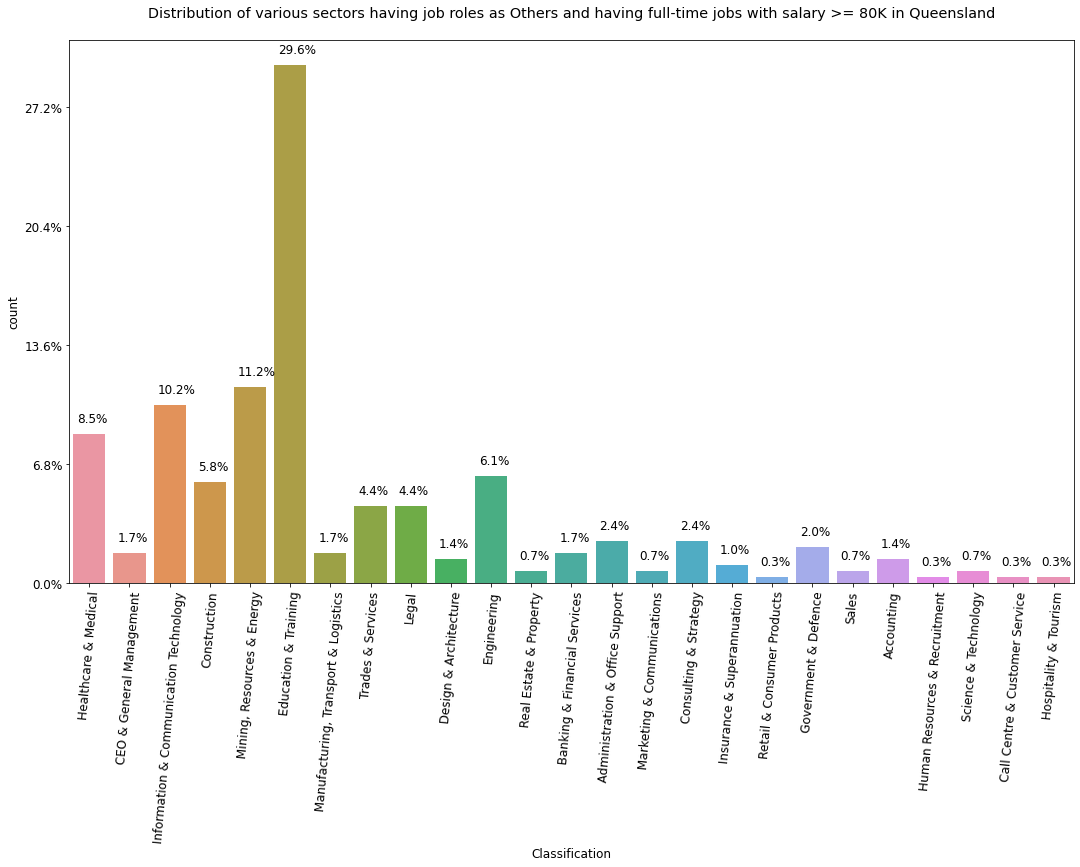

In [97]:

total = len(df_otherRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_otherRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors having job roles as Others and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as Others.png')

- The following job-sectors (in decreasing job-share percentage) constitute more than 70% of full-time job roles as Others with salary >= 80K in Queensland:
  - Education & Training
  - Mining, Resources & Energy
  - Information & Communication Technology
  - Healthcare & Medical
  - Engineering
  - Construction


In [98]:
# Get the top 10 sectors from the above plot(Distribution of various sectors having job roles as Others and having full-time jobs with salary >= 80K in Queensland)
for x in df_otherRolesClass.Classification.value_counts().index[:10]:
  print('-',x)

- Education & Training
- Mining, Resources & Energy
- Information & Communication Technology
- Healthcare & Medical
- Engineering
- Construction
- Trades & Services
- Legal
- Administration & Office Support
- Consulting & Strategy


In [99]:
# Get the lowest 10 sectors from the above plot(Distribution of various sectors having job roles as Others and having full-time jobs with salary >= 80K in Queensland)
for x in df_otherRolesClass.Classification.value_counts().index[-10:]:
  print('-',x)

- Design & Architecture
- Insurance & Superannuation
- Sales
- Real Estate & Property
- Science & Technology
- Marketing & Communications
- Retail & Consumer Products
- Hospitality & Tourism
- Human Resources & Recruitment
- Call Centre & Customer Service


### NEW- Plots for all the SubClassifications mentioned in 8th point of word doc

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Management and having full-time jobs with salary >= 80K in Queensland\n')

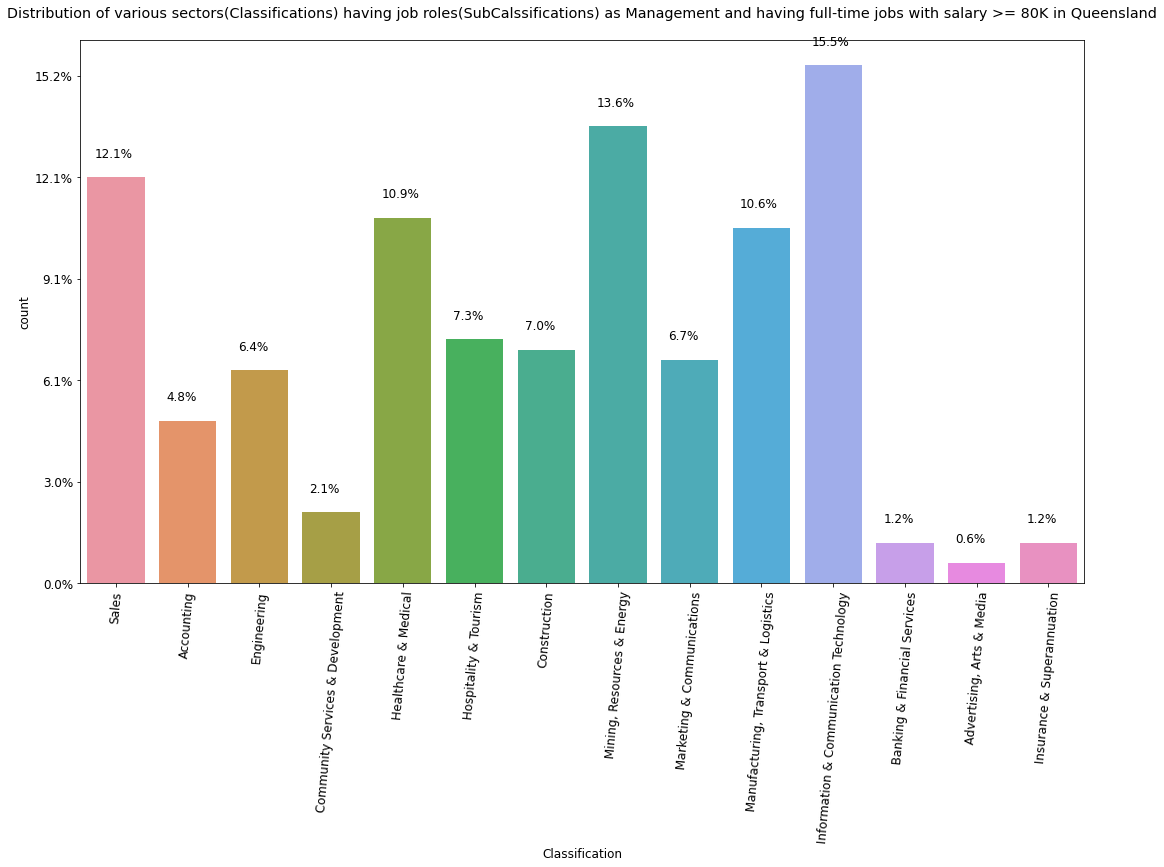

In [153]:
df_ManagementRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Management']

total = len(df_ManagementRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_ManagementRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Management and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as Management.png')

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Government - State and having full-time jobs with salary >= 80K in Queensland\n')

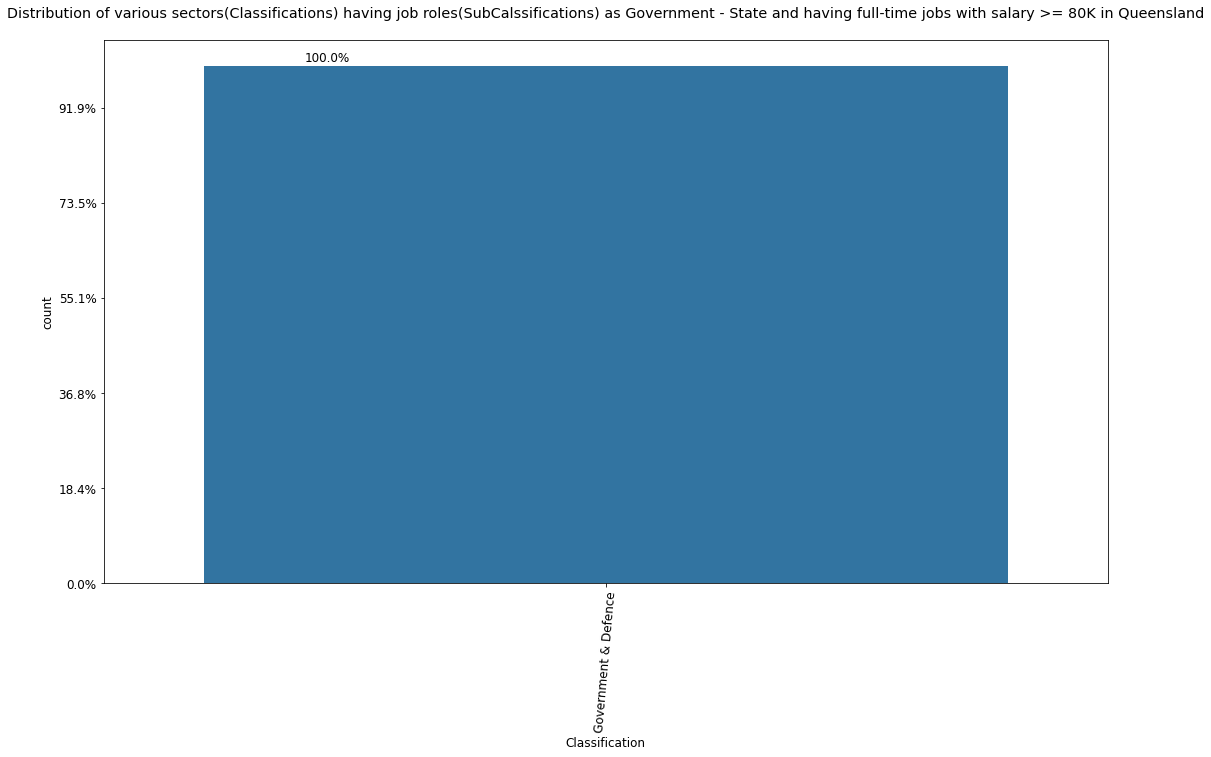

In [152]:
df_GovernmentStateRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Government - State']

total = len(df_GovernmentStateRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_GovernmentStateRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Government - State and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as GovernmentState.png')

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Mining - Engineering & Maintenance and having full-time jobs with salary >= 80K in Queensland\n')

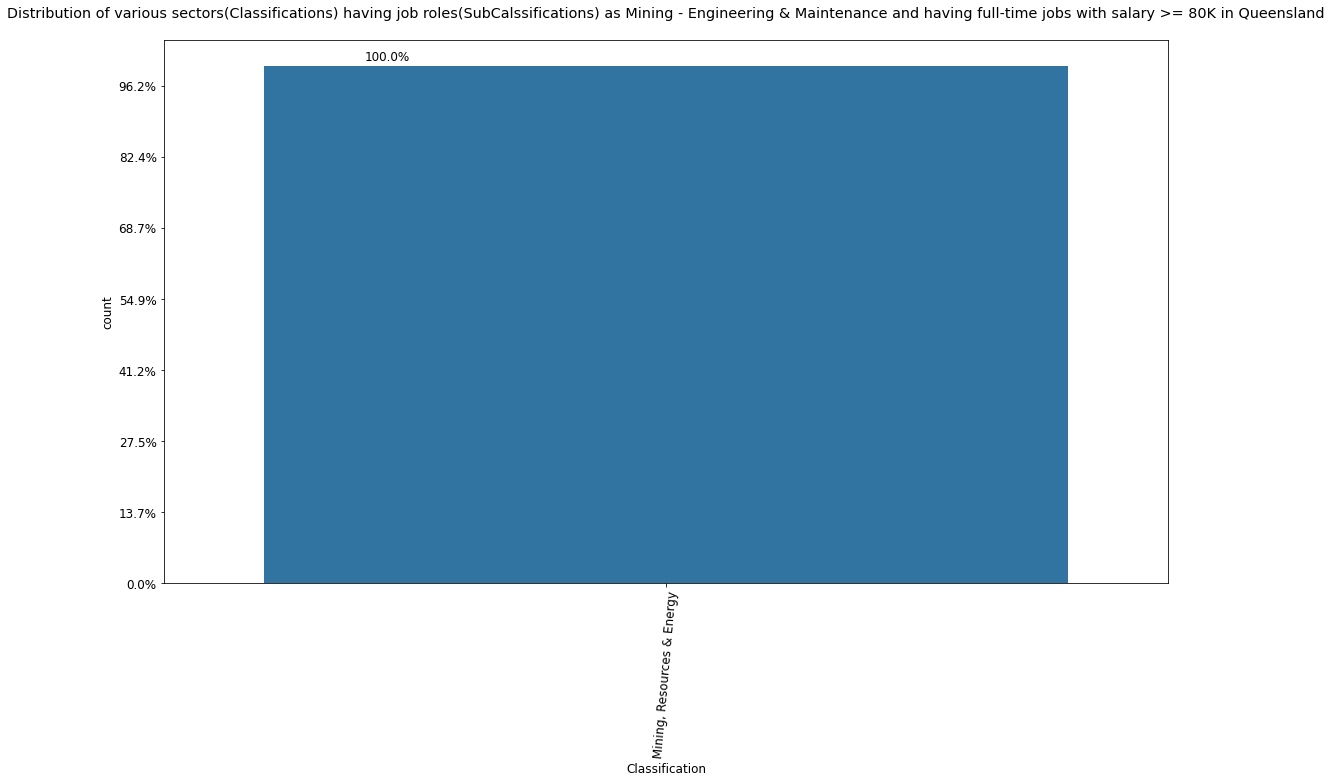

In [151]:
df_MiningEngineeringMaintenanceRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Mining - Engineering & Maintenance']

total = len(df_MiningEngineeringMaintenanceRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_MiningEngineeringMaintenanceRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Mining - Engineering & Maintenance and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as MiningEngineering & Maintenance.png')

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Project Management and having full-time jobs with salary >= 80K in Queensland\n')

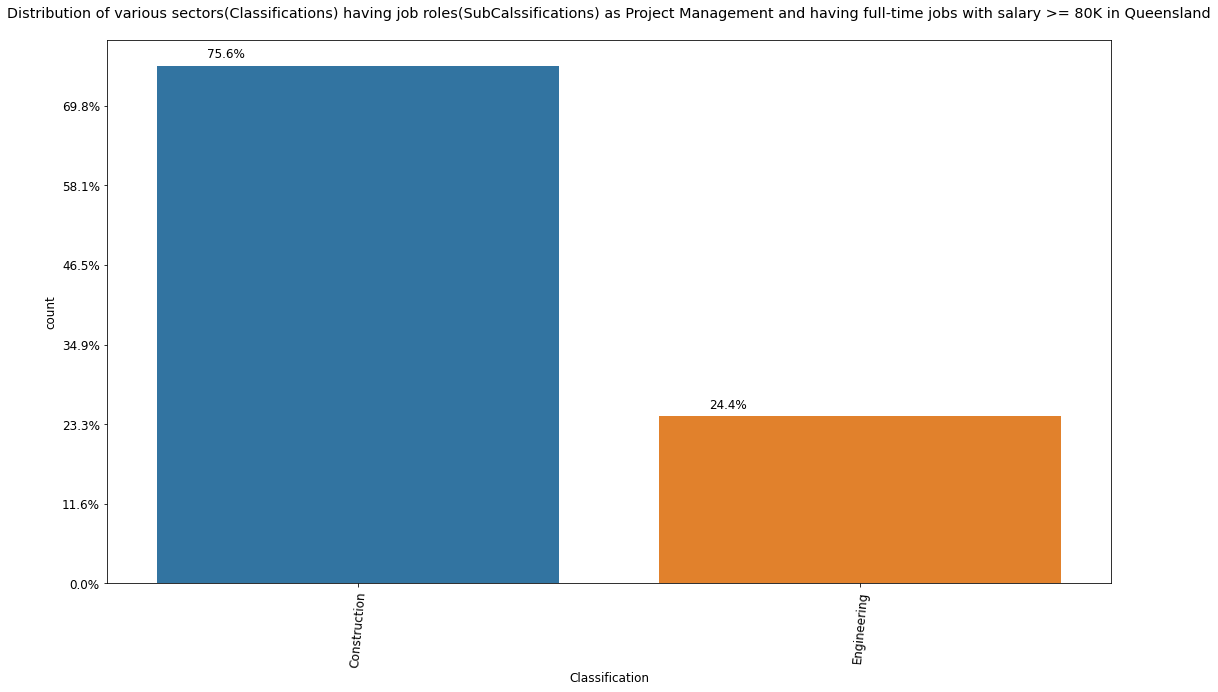

In [150]:
df_ProjectManagementRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Project Management']

total = len(df_ProjectManagementRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_ProjectManagementRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Project Management and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as Project Management.png')

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Civil/Structural Engineering and having full-time jobs with salary >= 80K in Queensland\n')

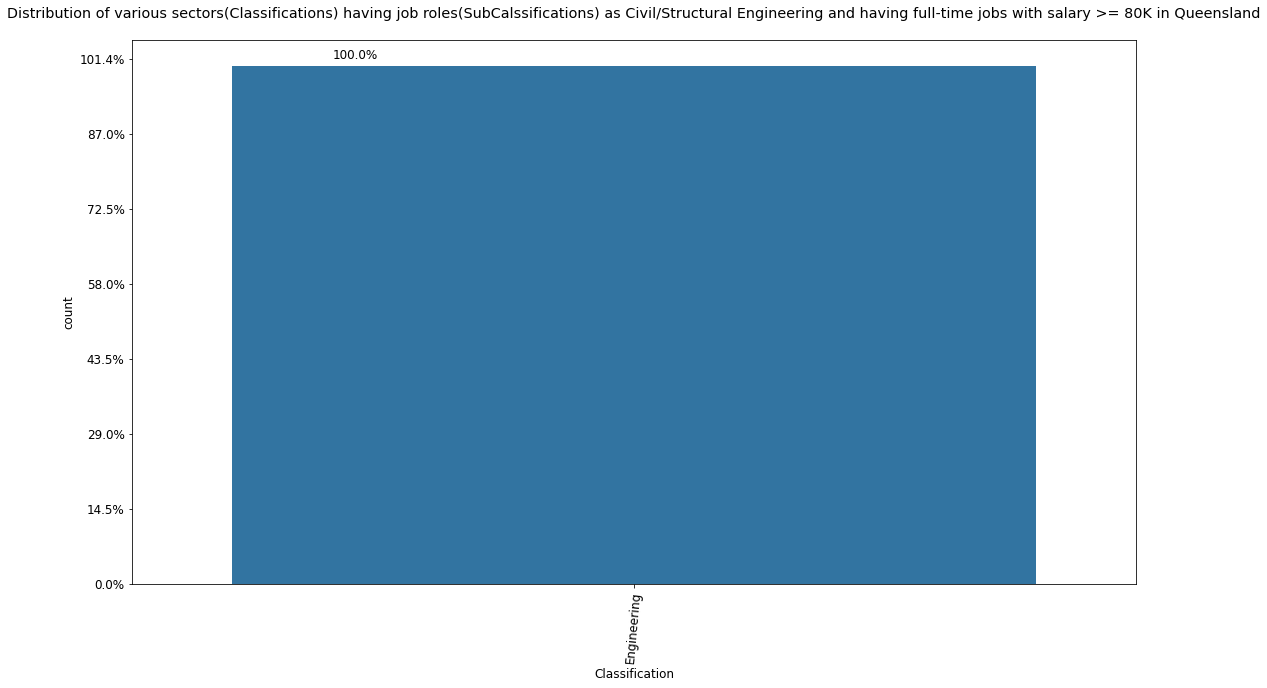

In [149]:
df_CivilStructuralEngineeringRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Civil/Structural Engineering']

total = len(df_CivilStructuralEngineeringRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_CivilStructuralEngineeringRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Civil/Structural Engineering and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as CivilStructural Engineering.png')

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as General Practitioners and having full-time jobs with salary >= 80K in Queensland\n')

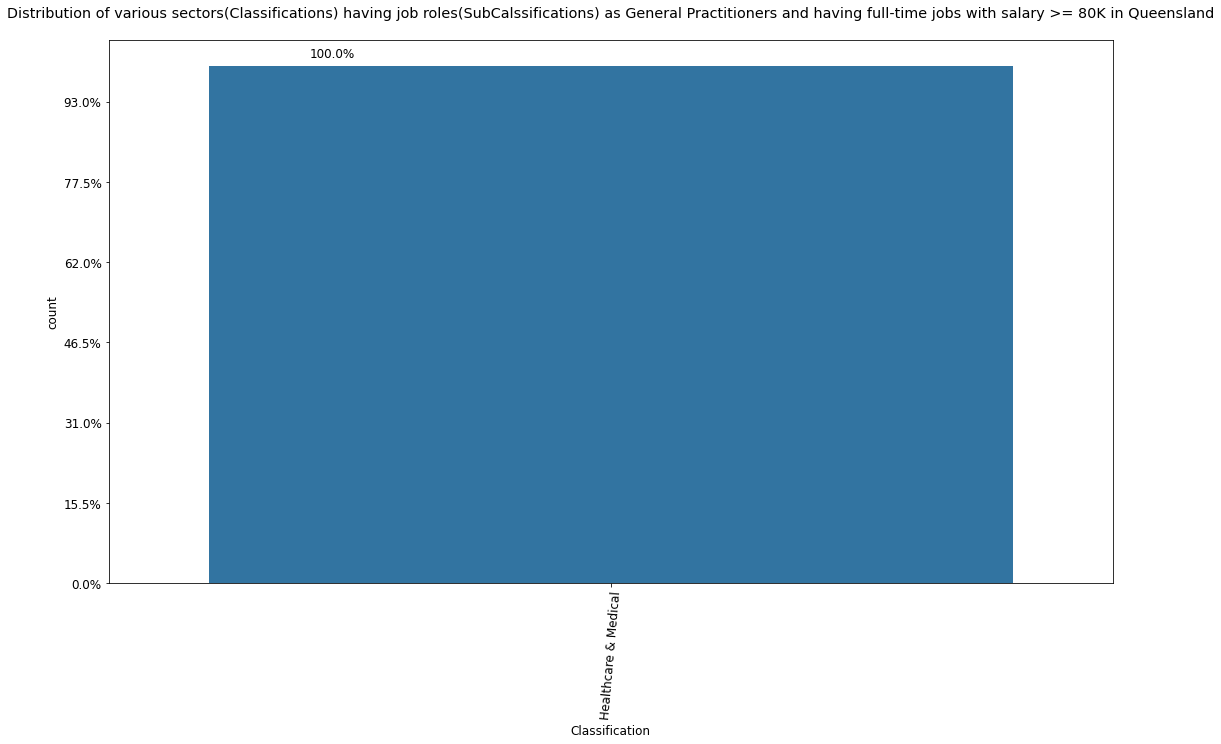

In [148]:
df_GeneralPractitionersRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='General Practitioners']

total = len(df_GeneralPractitionersRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_GeneralPractitionersRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as General Practitioners and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as General Practitioners.png')

Text(0.5, 1.0, 'Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Developers/Programmers and having full-time jobs with salary >= 80K in Queensland\n')

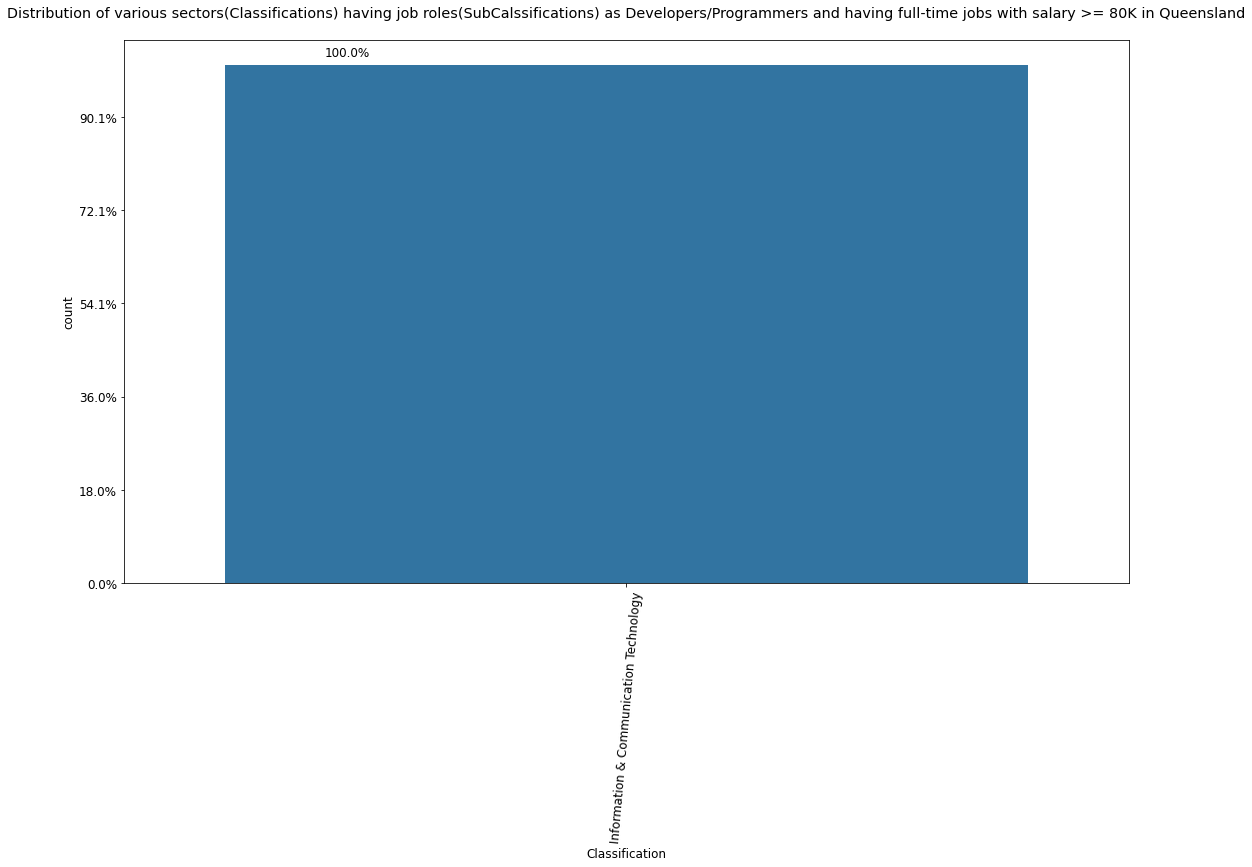

In [147]:
df_DevelopersProgrammersRolesClass = salMoreThan80k[salMoreThan80k['SubClassification']=='Developers/Programmers']

total = len(df_DevelopersProgrammersRolesClass)*1.
ax=sns.countplot(x="Classification", data=df_DevelopersProgrammersRolesClass)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors(Classifications) having job roles(SubCalssifications) as Developers/Programmers and having full-time jobs with salary >= 80K in Queensland\n")
#plt.savefig('Distribution of various sectors having job roles as Developers/Programmers.png')

### Scenario 2


In [100]:
'''
for x in df.SubClassification.value_counts().index[-15:]:
  print('-',x)
'''

"\nfor x in df.SubClassification.value_counts().index[-15:]:\n  print('-',x)\n"

Text(0.5, 1.0, 'Distribution of Jobs in various sectors in the Job-Market Dataset\n')

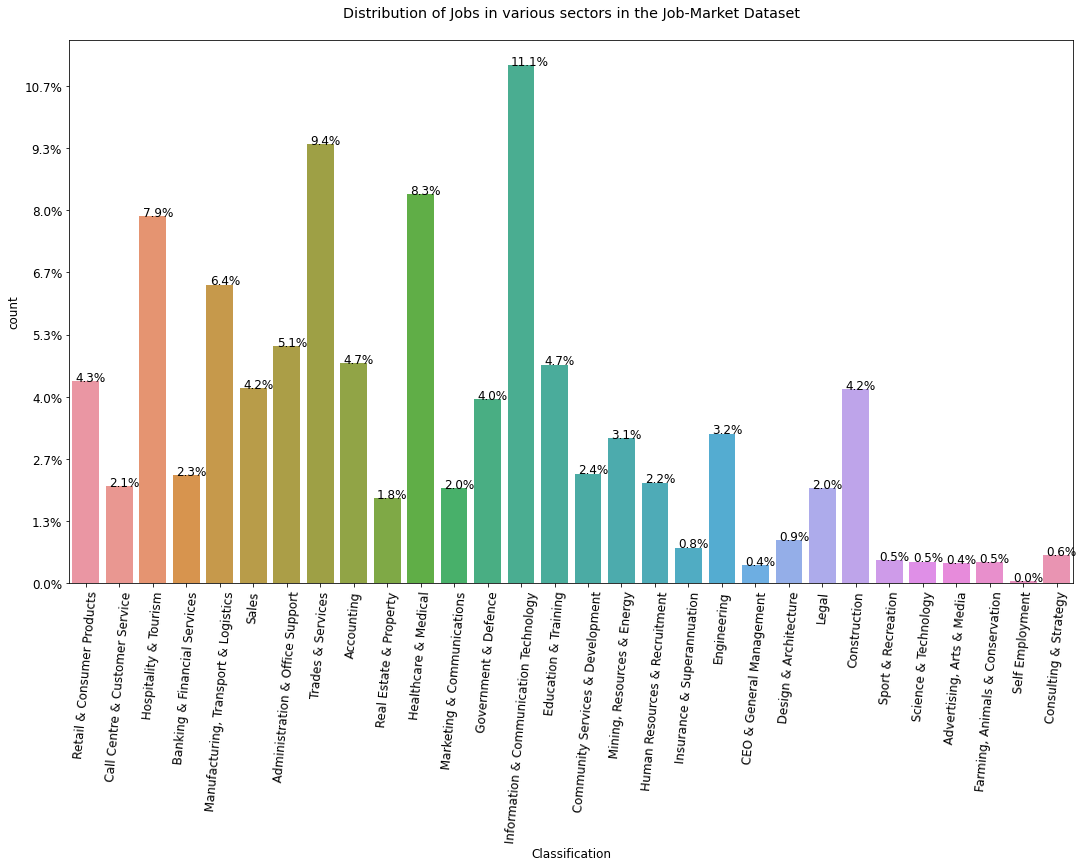

In [101]:

total = len(df)*1.
ax=sns.countplot(x="Classification", data=df)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of Jobs in various sectors in the Job-Market Dataset\n")
#plt.savefig('Distribution of Jobs in various sectors in the provide Job-Market Dataset.png')

In [102]:
# Get the top 10 sectors from the above plot(Distribution of Jobs in various sectors in the Job-Market Dataset)
for x in df.Classification.value_counts().index[:10]:
  print('-',x)

- Information & Communication Technology
- Trades & Services
- Healthcare & Medical
- Hospitality & Tourism
- Manufacturing, Transport & Logistics
- Administration & Office Support
- Accounting
- Education & Training
- Retail & Consumer Products
- Sales


In [103]:
# Get the lowest 10 sectors from the above plot(Distribution of Jobs in various sectors in the Job-Market Dataset)
for x in df.Classification.value_counts().index[-10:]:
  print('-',x)

- Real Estate & Property
- Design & Architecture
- Insurance & Superannuation
- Consulting & Strategy
- Sport & Recreation
- Science & Technology
- Farming, Animals & Conservation
- Advertising, Arts & Media
- CEO & General Management
- Self Employment


### NEW- Scenario 2: Get the list of subClassifications in the Top 5 Classifications

In [ ]:
topClassifications = df.Classification.value_counts().index[:5]

# Get the list of subClassifications in the Bottom 5 Classifications

df_subClassTopClass = pd.DataFrame()

for x in topClassifications:
  df_top = salMoreThan80k[salMoreThan80k['Classification'] == x]
  for i in set(df_top.SubClassification.values):
    df_subClass = df_top[df_top['SubClassification'] == i]
    df_highestSal = df_subClass.iloc[df_subClass['HighestSalary'].argmax()]
    df_subClassTopClass = df_subClassTopClass.append({x:i,},
                                                         ignore_index = True)

df_subClassTopClass = df_subClassTopClass.replace(np.nan, '', regex=True)


In [183]:
df_subClassTopClass.tail(50)

,Information & Communication Technology,Trades & Services,Healthcare & Medical,Hospitality & Tourism,"Manufacturing, Transport & Logistics"
31,,Air Conditioning & Refrigeration,,,
32,,"Fitters, Turners & Machinists",,,
33,,,Pharmacy,,
34,,,Medical Specialists,,
35,,,Nursing - General Medical & Surgical,,
36,,,"Physiotherapy, OT & Rehabilitation",,
37,,,Optical,,
38,,,Management,,
39,,,Medical Administration,,
40,,,Nursing - Aged Care,,


In [181]:
df_subClassTopClass['Information & Communication Technology'][:19]

0                                Management
1                 Business/Systems Analysts
2                                     Other
3          Product Management & Development
4                                  Security
5     Database Development & Administration
6                        Sales - Pre & Post
7              Web Development & Production
8                        Telecommunications
9                    Engineering - Hardware
10                    Engineering - Network
11        Networks & Systems Administration
12                   Developers/Programmers
13                   Engineering - Software
14                             Team Leaders
15                              Consultants
16           Programme & Project Management
17                   Help Desk & IT Support
18                               Architects
Name: Information & Communication Technology, dtype: object

In [182]:
df_subClassTopClass['Trades & Services'][20:32]

20                        Electricians
21                         Technicians
22                               Other
23              Hair & Beauty Services
24                            Plumbers
25                           Labourers
26          Carpentry & Cabinet Making
27                   Automotive Trades
28             Painters & Sign Writers
29                     Building Trades
30              Welders & Boilermakers
31    Air Conditioning & Refrigeration
Name: Trades & Services, dtype: object

In [184]:
df_subClassTopClass['Healthcare & Medical'][33:61]

33                                           Pharmacy
34                                Medical Specialists
35               Nursing - General Medical & Surgical
36                 Physiotherapy, OT & Rehabilitation
37                                            Optical
38                                         Management
39                             Medical Administration
40                                Nursing - Aged Care
41                       Nursing - Theatre & Recovery
42                        Nursing - Paediatric & PICU
43                          Clinical/Medical Research
44                                              Other
45                 Nursing - Educators & Facilitators
46                               Ambulance/Paramedics
47         Nursing - Midwifery, Neo-Natal, SCN & NICU
48                             Residents & Registrars
49                         Chiropractic & Osteopathic
50    Nursing - Psych, Forensic & Correctional Health
51                 Nursing -

In [187]:
df_subClassTopClass['Hospitality & Tourism'][62:65]

62     Management
63          Other
64    Chefs/Cooks
Name: Hospitality & Tourism, dtype: object

In [188]:
df_subClassTopClass['Manufacturing, Transport & Logistics'][65:80]

65                             Management
66      Production, Planning & Scheduling
67               Team Leaders/Supervisors
68                                  Other
69                      Machine Operators
70    Purchasing, Procurement & Inventory
71                       Fleet Management
72               Freight/Cargo Forwarding
73    Couriers, Drivers & Postal Services
74                         Road Transport
75    Warehousing, Storage & Distribution
76                   Analysis & Reporting
77                Import/Export & Customs
78            Quality Assurance & Control
79              Rail & Maritime Transport
Name: Manufacturing, Transport & Logistics, dtype: object

### NEW- Scenario 2: Get the list of subClassifications in the Bottom 5 Classifications

In [176]:
bottomClassifications = df.Classification.value_counts().index[-5:]
bottomClassifications
# Get the list of subClassifications in the Bottom 5 Classifications

df_subClassBottomClass = pd.DataFrame()

for x in bottomClassifications:
  df_top = salMoreThan80k[salMoreThan80k['Classification'] == x]
  for i in set(df_top.SubClassification.values):
    df_subClass = df_top[df_top['SubClassification'] == i]
    df_highestSal = df_subClass.iloc[df_subClass['HighestSalary'].argmax()]
    df_subClassBottomClass = df_subClassBottomClass.append({x:i,},
                                                         ignore_index = True)

df_subClassBottomClass = df_subClassBottomClass.replace(np.nan, '', regex=True)
df_subClassBottomClass

,Science & Technology,"Farming, Animals & Conservation","Advertising, Arts & Media",CEO & General Management,Self Employment
0,Other,,,,
1,Chemistry & Physics,,,,
2,Materials Sciences,,,,
3,"Environmental, Earth & Geosciences",,,,
4,Biotechnology & Genetics,,,,
5,Food Technology & Safety,,,,
6,"Mathematics, Statistics & Information Sciences",,,,
7,Biological & Biomedical Sciences,,,,
8,Quality Assurance & Control,,,,
9,Laboratory & Technical Services,,,,


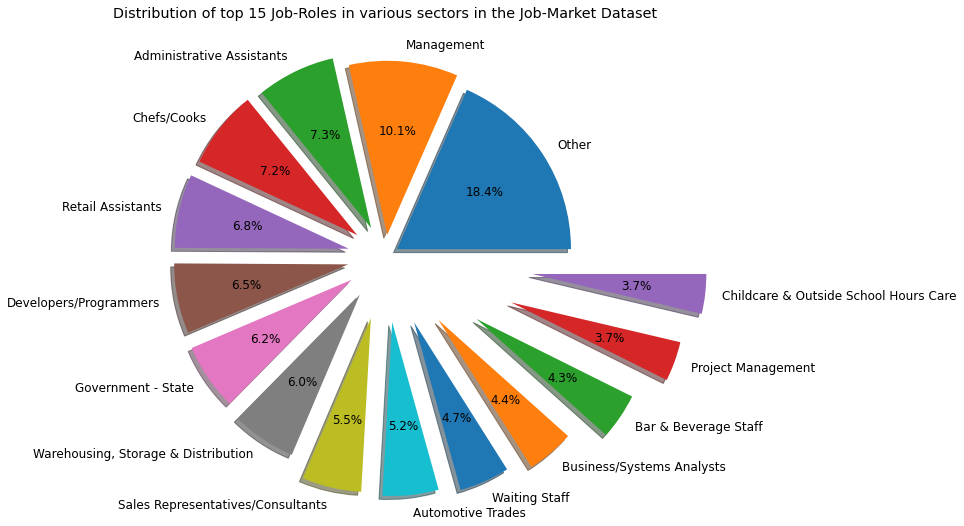

In [104]:
# 15 Job-Roles in various sectors
s = df.SubClassification.value_counts()[:15]
occurrences = s.values
labels = s.index

sampl = np.random.uniform(low=0, high=0.9, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8)) 
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Distribution of top 15 Job-Roles in various sectors in the Job-Market Dataset\n")
#plt.savefig('Distribution of top 15 Job-Roles in various sectors in the Job-Market Dataset.png')
#plt.rcParams['axes.facecolor'] = 'white'
plt.show()

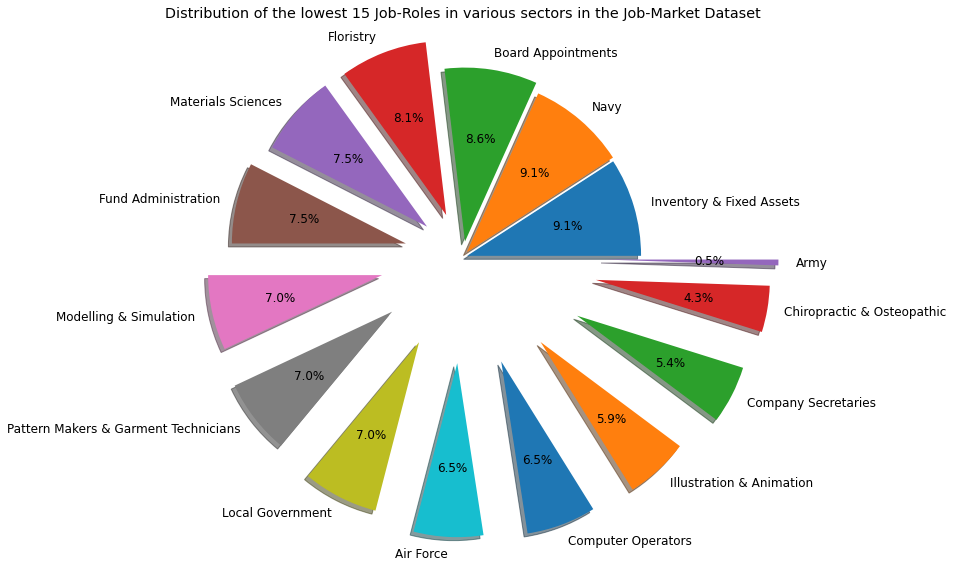

In [105]:
# 15 Job-Roles in various sectors
s = df.SubClassification.value_counts()[-15:]
occurrences = s.values
labels = s.index

sampl = np.random.uniform(low=0, high=0.9, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(12, 8)) 
plt.rcParams['font.size'] = 12
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Distribution of the lowest 15 Job-Roles in various sectors in the Job-Market Dataset\n")
#plt.savefig('Distribution of lowest 15 Job-Roles in various sectors in the Job-Market Dataset.png')
#plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [106]:
df_otherRolesClassS2 = df[df['SubClassification']=='Other']
df_otherRolesClassS2.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
17,37404280,Maintenance Assistant Part-Time,Costco Wholesale,2018-10-07T00:00:00.000Z,Melbourne,Eastern Suburbs,Retail & Consumer Products,Other,Provides janitorial services and general maint...,NaN,0,30,NaN
40,37404400,Project Officer,Metro South Health,2018-10-07T00:00:00.000Z,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN
48,37404244,Experienced Bicycle Mechanic,NaN,2018-10-07T00:00:00.000Z,Perth,Northern Suburbs & Joondalup,Retail & Consumer Products,Other,Experienced bicycle mechanic required.,NaN,0,30,NaN
55,37404398,Project Officer - BRiTA Futures,Metro South Health,2018-10-07T00:00:00.000Z,Brisbane,NaN,Administration & Office Support,Other,Queensland Transcultural Mental Health Centre ...,NaN,0,30,NaN
85,37404371,"Team Manager, Asgard Servicing Team",BT Financial Group,2018-10-07T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Banking & Financial Services,Other,Team Manager Inspirational leader wanted Ho...,NaN,0,30,NaN


Text(0.5, 1.0, 'Distribution of various sectors having job roles as Others in the Job-Market Dataset\n')

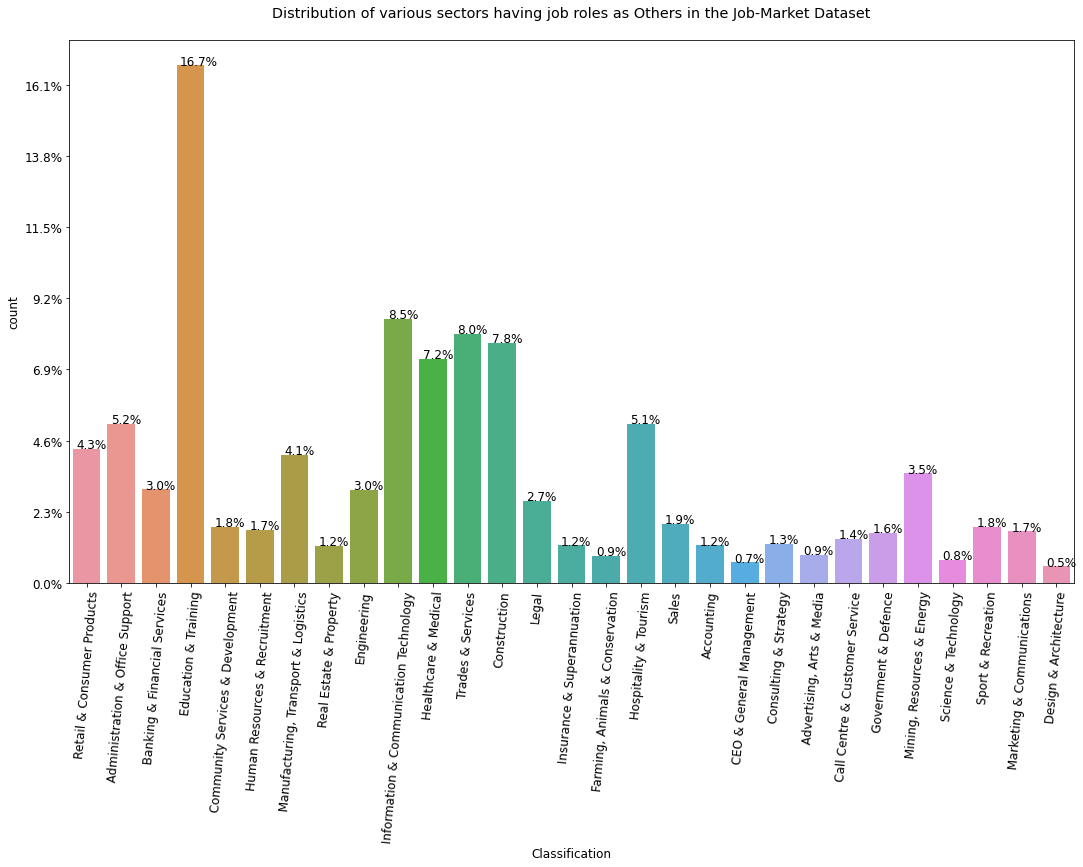

In [107]:

total = len(df_otherRolesClassS2)*1.
ax=sns.countplot(x="Classification", data=df_otherRolesClassS2)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of various sectors having job roles as Others in the Job-Market Dataset\n")
#plt.savefig('Distribution of various sectors having job roles as Others in the Job-Market Dataset.png')

In [108]:
# Get the top 10 sectors from the above plot(Distribution of various sectors having job roles as Others in the Job-Market Dataset)
for x in df_otherRolesClassS2.Classification.value_counts().index[:10]:
  print('-',x)

- Education & Training
- Information & Communication Technology
- Trades & Services
- Construction
- Healthcare & Medical
- Administration & Office Support
- Hospitality & Tourism
- Retail & Consumer Products
- Manufacturing, Transport & Logistics
- Mining, Resources & Energy


In [109]:
# Get the 10 lowest sectors from the above plot(Distribution of various sectors having job roles as Others in the Job-Market Dataset)
for x in df_otherRolesClassS2.Classification.value_counts().index[-10:]:
  print('-',x)

- Call Centre & Customer Service
- Consulting & Strategy
- Accounting
- Insurance & Superannuation
- Real Estate & Property
- Advertising, Arts & Media
- Farming, Animals & Conservation
- Science & Technology
- CEO & General Management
- Design & Architecture


# NEW- Analysis of the Period for which data was collected for Job Market Dataset

Text(0.5, 1.0, 'Distribution of ads during various days for Job Market Dataset\n')

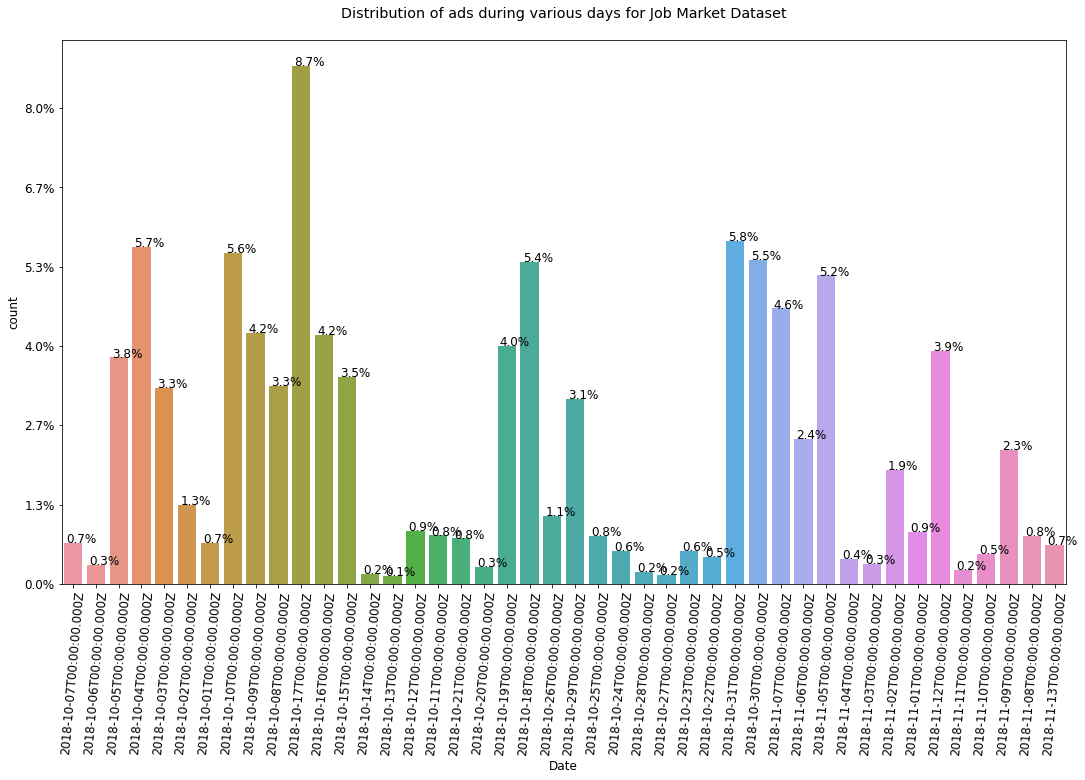

In [196]:
total = len(df)*1.
ax=sns.countplot(x="Date", data=df)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.rcParams['font.size'] = 12
plt.xticks(rotation=85)
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Distribution of ads during various days for Job Market Dataset\n")
#plt.savefig('Distribution of ads.png')

In [193]:
df.Date.value_counts()

2018-10-17T00:00:00.000Z    13059
2018-10-31T00:00:00.000Z     8641
2018-10-04T00:00:00.000Z     8506
2018-10-10T00:00:00.000Z     8337
2018-10-30T00:00:00.000Z     8179
2018-10-18T00:00:00.000Z     8121
2018-11-05T00:00:00.000Z     7778
2018-11-07T00:00:00.000Z     6947
2018-10-09T00:00:00.000Z     6329
2018-10-16T00:00:00.000Z     6267
2018-10-19T00:00:00.000Z     5989
2018-11-12T00:00:00.000Z     5865
2018-10-05T00:00:00.000Z     5711
2018-10-15T00:00:00.000Z     5210
2018-10-08T00:00:00.000Z     4995
2018-10-03T00:00:00.000Z     4945
2018-10-29T00:00:00.000Z     4656
2018-11-06T00:00:00.000Z     3654
2018-11-09T00:00:00.000Z     3377
2018-11-02T00:00:00.000Z     2874
2018-10-02T00:00:00.000Z     1980
2018-10-26T00:00:00.000Z     1701
2018-10-12T00:00:00.000Z     1324
2018-11-01T00:00:00.000Z     1316
2018-10-11T00:00:00.000Z     1221
2018-10-25T00:00:00.000Z     1205
2018-11-08T00:00:00.000Z     1199
2018-10-21T00:00:00.000Z     1145
2018-10-07T00:00:00.000Z     1037
2018-10-01T00:

In [198]:
(df.Date.value_counts().values).mean()

3409.068181818182

- Most number of ads were on date: 2018-10-17 :   13059
- Least number of ads were on date: 2018-10-13 :      196
- Average number of ads for the period is: 3409

In [200]:
df['Date'] = pd.to_datetime(df.Date)

In [201]:
df['Time of Day'] = df['Date'].dt.hour
df['Time of Day'].value_counts()

0    149999
Name: Time of Day, dtype: int64

In [202]:
df['Day of Week'] = df['Date'].dt.day_name()
df['Day of Week'].value_counts()

Wednesday    42764
Monday       30215
Tuesday      28222
Thursday     21568
Friday       20976
Sunday        3691
Saturday      2563
Name: Day of Week, dtype: int64

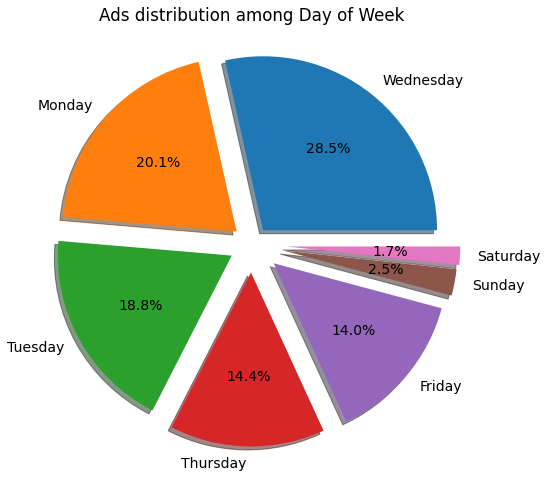

In [203]:
s = df['Day of Week'].value_counts()
occurrences = s.values
labels = s.index
sampl = np.random.uniform(low=0.1, high=0.2, size=(len(s),))
sampl.sort()

explode = tuple(sampl)

fig = plt.figure(figsize =(14, 8)) 
plt.rcParams['font.size'] = 14
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Ads distribution among Day of Week")
#plt.savefig('Ads distribution among Day of Week.png')
plt.show() 

- Wednesdays constitute most percentage of ads: 28.5%
- Followed by Monday, Tuesday, Thursday, Friday, Sunday, and Saturday
- Saturdays constitute the least percentage of ads: 1.7%

In [206]:
print("First Date of the Job Market Dataset: ",df.Date.min())
print("Last Date of the Job Market Dataset: ",df.Date.max())
print("Total no. of days: ",df.Date.max()-df.Date.min())

First Date of the Job Market Dataset:  2018-10-01 00:00:00+00:00
Last Date of the Job Market Dataset:  2018-11-13 00:00:00+00:00
Total no. of days:  43 days 00:00:00


- First Date of the Job Market Dataset:  2018-10-01 00:00:00+00:00
- Last Date of the Job Market Dataset:  2018-11-13 00:00:00+00:00
- Total no. of days:  43 days 00:00:00

### NEW- Forecasting

In [308]:
df_forecasting = pd.DataFrame({'Date':df.Date.value_counts().index, 'Job_Postings':df.Date.value_counts().values })

In [309]:
df_forecasting.head()

,Date,Job_Postings
0,2018-10-17 00:00:00+00:00,13059
1,2018-10-31 00:00:00+00:00,8641
2,2018-10-04 00:00:00+00:00,8506
3,2018-10-10 00:00:00+00:00,8337
4,2018-10-30 00:00:00+00:00,8179


In [310]:
df_forecasting.set_index('Date',inplace=True)

In [311]:
df_forecasting['7_Day_Moving_Average'] = df_forecasting.rolling(window=7).mean()
#df_forecasting['30_Day_Moving_Average'] = df_forecasting.rolling(30).sum()

In [312]:
df_forecasting.head()

,Job_Postings,7_Day_Moving_Average
Date,,
2018-10-17 00:00:00+00:00,13059,NaN
2018-10-31 00:00:00+00:00,8641,NaN
2018-10-04 00:00:00+00:00,8506,NaN
2018-10-10 00:00:00+00:00,8337,NaN
2018-10-30 00:00:00+00:00,8179,NaN


In [313]:
df_forecasting = df_forecasting.fillna(0)
df_forecasting.head()

,Job_Postings,7_Day_Moving_Average
Date,,
2018-10-17 00:00:00+00:00,13059,0.0
2018-10-31 00:00:00+00:00,8641,0.0
2018-10-04 00:00:00+00:00,8506,0.0
2018-10-10 00:00:00+00:00,8337,0.0
2018-10-30 00:00:00+00:00,8179,0.0


In [315]:
df_forecasting.describe()

,Job_Postings,7_Day_Moving_Average
count,44.000000,44.000000
mean,3409.068182,2726.126623
std,3248.113609,2744.493342
min,196.000000,0.000000
25%,806.000000,595.000000
50%,1512.500000,1254.142857
75%,5896.000000,5088.535714
max,13059.000000,8945.857143


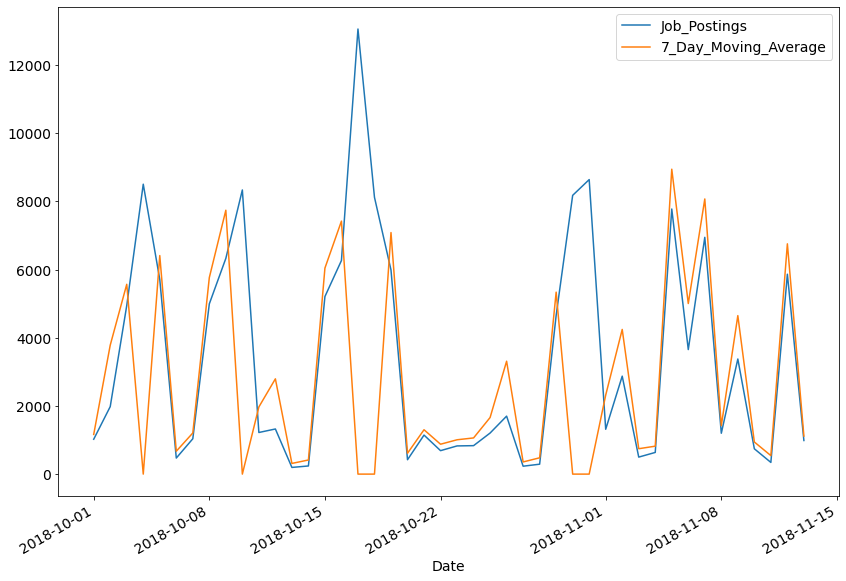

In [316]:
df_forecasting.plot(figsize=(14,10))

In [266]:
df.Classification.value_counts()

Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  

### NEW- Information & Technology Forecasting

In [317]:
df_forecastIT = df[df['Classification']=='Information & Communication Technology']

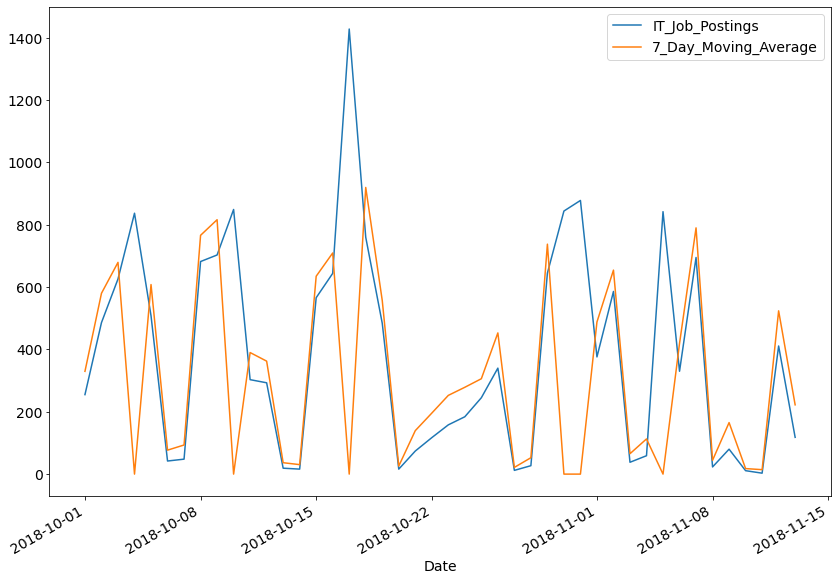

In [318]:
df_forecastIT = pd.DataFrame({'Date':df_forecastIT.Date.value_counts().index, 'IT_Job_Postings':df_forecastIT.Date.value_counts().values })
df_forecastIT.set_index('Date',inplace=True)
df_forecastIT['7_Day_Moving_Average'] = df_forecastIT.rolling(window=7).mean()
#df_forecasting['30_Day_Moving_Average'] = df_forecasting.rolling(30).sum()
df_forecastIT = df_forecastIT.fillna(0)
df_forecastIT.plot(figsize=(14,10))

### NEW- Healthcare & Medical Forecasting

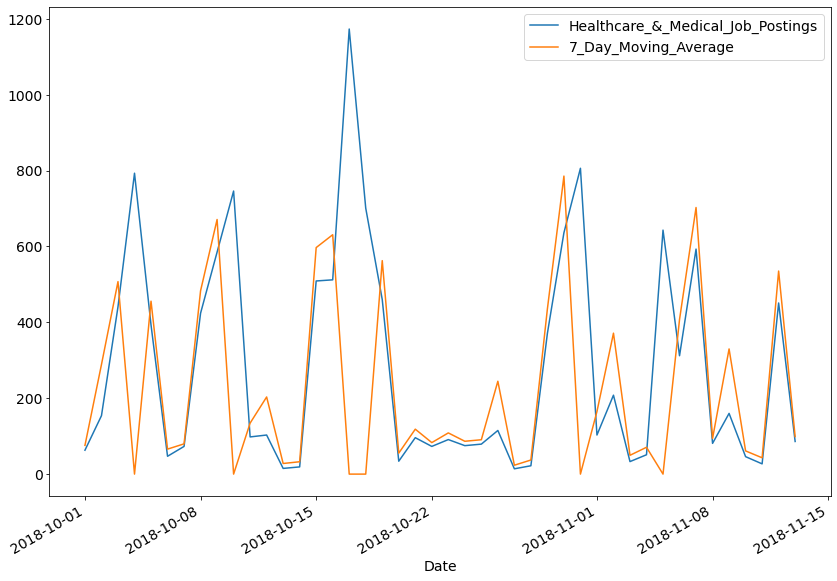

In [319]:
df_forecastHM = df[df['Classification']=='Healthcare & Medical']
df_forecastHM = pd.DataFrame({'Date':df_forecastHM.Date.value_counts().index, 'Healthcare_&_Medical_Job_Postings':df_forecastHM.Date.value_counts().values })
df_forecastHM.set_index('Date',inplace=True)
df_forecastHM['7_Day_Moving_Average'] = df_forecastHM.rolling(window=7).mean()
#df_forecasting['30_Day_Moving_Average'] = df_forecasting.rolling(30).sum()
df_forecastHM = df_forecastHM.fillna(0)
df_forecastHM.plot(figsize=(14,10))

### NEW- Trades & Services Forecasting

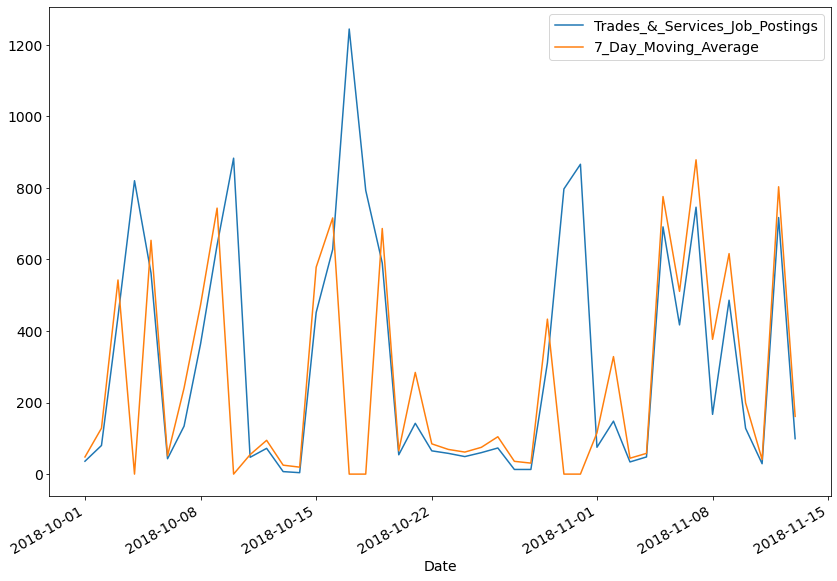

In [321]:
df_forecastTS = df[df['Classification']=='Trades & Services']
df_forecastTS = pd.DataFrame({'Date':df_forecastTS.Date.value_counts().index, 'Trades_&_Services_Job_Postings':df_forecastTS.Date.value_counts().values })
df_forecastTS.set_index('Date',inplace=True)
df_forecastTS['7_Day_Moving_Average'] = df_forecastTS.rolling(window=7).mean()
#df_forecasting['30_Day_Moving_Average'] = df_forecasting.rolling(30).sum()
df_forecastTS = df_forecastTS.fillna(0)
df_forecastTS.plot(figsize=(14,10))

### NEW- Manufacturing, Transport & Logistics Forecasting

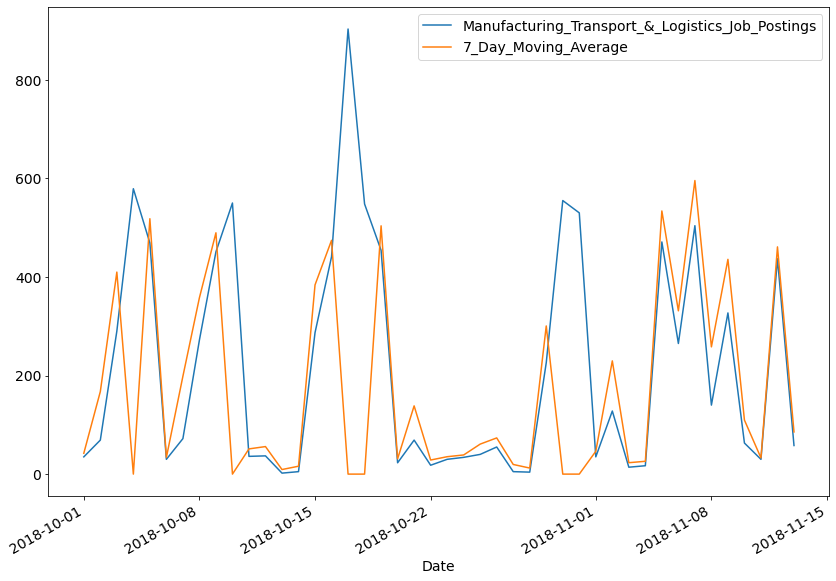

In [324]:
df_forecastMTL = df[df['Classification']=='Manufacturing, Transport & Logistics']
df_forecastMTL = pd.DataFrame({'Date':df_forecastMTL.Date.value_counts().index, 'Manufacturing_Transport_&_Logistics_Job_Postings':df_forecastMTL.Date.value_counts().values })
df_forecastMTL.set_index('Date',inplace=True)
df_forecastMTL['7_Day_Moving_Average'] = df_forecastMTL.rolling(window=7).mean()
#df_forecasting['30_Day_Moving_Average'] = df_forecasting.rolling(30).sum()
df_forecastMTL = df_forecastMTL.fillna(0)
df_forecastMTL.plot(figsize=(14,10))

### NEW- Engineering Forecasting

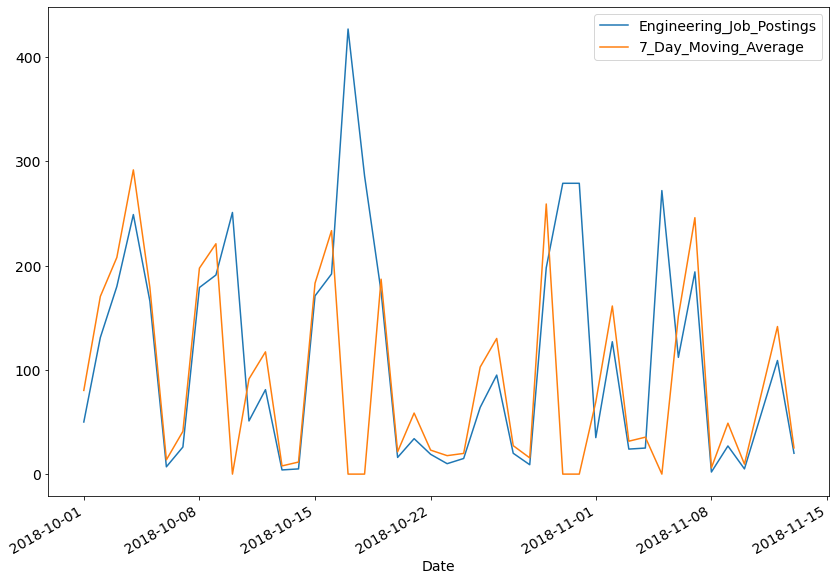

In [325]:
df_forecastEngg = df[df['Classification']=='Engineering']
df_forecastEngg = pd.DataFrame({'Date':df_forecastEngg.Date.value_counts().index, 'Engineering_Job_Postings':df_forecastEngg.Date.value_counts().values })
df_forecastEngg.set_index('Date',inplace=True)
df_forecastEngg['7_Day_Moving_Average'] = df_forecastEngg.rolling(window=7).mean()
#df_forecasting['30_Day_Moving_Average'] = df_forecasting.rolling(30).sum()
df_forecastEngg = df_forecastEngg.fillna(0)
df_forecastEngg.plot(figsize=(14,10))

### NEW- Getting 5 Most Frequently Advertising Companies

In [ ]:
df_mostFrequentAds = df.Company.value_counts()[:5]
df_mostFrequentAds

In [ ]:
df_Jora = df[df['Company']=='Jora Local']

print("Jora Local ran total: 4896 Ads")
print("First Date of Jora Local Ads: ",df_Jora.Date.min())
print("Last Date of Jora Local Ads: ",df_Jora.Date.max())
print("Total no. of days Jora Local ran ads for: ",df_Jora.Date.max()-df_Jora.Date.min())

In [ ]:
df_Hudson = df[df['Company']=='Hudson']

print("Hudson ran total: 804 Ads")
print("First Date of Hudson Ads: ",df_Hudson.Date.min())
print("Last Date of Hudson Ads: ",df_Hudson.Date.max())
print("Total no. of days Hudson ran ads for: ",df_Hudson.Date.max()-df_Hudson.Date.min())

In [ ]:

df_Design = df[df['Company']=='Design & Build']

df_Design = df_Design[df_Design['Company'].notna()]
                
print("Design & Build ran total: 701 Ads")
print("First Date of Design & Build Ads: ",df_Design.Date.min())
print("Last Date of Design & Build Ads: ",df_Design.Date.max())
print("Total no. of days Design & Build ran ads for: ",df_Design.Date.max()-df_Design.Date.min())


In [ ]:
df_Programmed = df[df['Company']=='Programmed Skilled Workforce']

print("Programmed Skilled Workforce ran total: 680 Ads")
print("First Date of Programmed Skilled Workforce Ads: ",df_Programmed.Date.min())
print("Last Date of Programmed Skilled Workforce Ads: ",df_Programmed.Date.max())
print("Total no. of days Programmed Skilled Workforce ran ads for: ",df_Programmed.Date.max()-df_Programmed.Date.min())

In [ ]:
df_Robert = df[df['Company']=='Robert Walters']

print("Robert Walters ran total: 672 Ads")
print("First Date of Robert Walters Ads: ",df_Robert.Date.min())
print("Last Date of Robert Walters Ads: ",df_Robert.Date.max())
print("Total no. of days Robert Walters ran ads for: ",df_Robert.Date.max()-df_Robert.Date.min())

In [ ]:
df_Paxus = df[df['Company']=='Paxus']

print("Paxus ran total: 657 Ads")

print("First Date of Paxus Ads: ",df_Paxus.Date.min())
print("Last Date of Paxus Ads: ",df_Paxus.Date.max())
print("Total no. of days Paxus ran ads for: ",df_Paxus.Date.max()-df_Paxus.Date.min())

# Discussion
---

### Scenario 1
---

Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his
school. He is finding a major in the University which can guarantee a job in his state
(Queensland) with a good income (>=80K) in the future. Based on the current job market
dataset, which major and the related subjects do you recommend him? Explain your
choice.

**Explanation:**

As we are aware that Tom has just passed out of school with good results in all of his subjects and he is looking for a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future, I have come up with many insights after thorough analysis of the job market dataset provided. All of the insights are discussed below:

1. We started our analysis by finding all the locations in the state of Queensland, Tom's home state, and we found the following locations:
  - Brisbane
  - Mackay & Coalfields
  - Cairns & Far North
  - Toowoomba & Darling Downs
  - Gladstone & Central QLD
  - Rockhampton & Capricorn Coast
  - Sunshine Coast
  - Bundaberg & Wide Bay Burnett
  - Hervey Bay & Fraser Coast

2. We then proceeded by finding all the job-types in the state of Queensland  that pay atleast 80K salary. We found the following types:
  - Full Time
  - Contract/Temp
  - Casual/Vacation
  - Part Time

3. For job-security purpose, Tom should consider Full Time job-type because that will be more stable as compared to other job-types
  - There are total 5036 Full Time jobs with salary >= 80K in Queensland


5. Next, we found the distribution of Full-Time jobs with salary >= 80K in Queensland and came up with the following insights:
  - Jobs with lowest salary 100K make upto 29.5% of all jobs with salary >= 80K in Queensland

  - Jobs with lowest salary 80K make upto 25.9% of all jobs with salary >= 80K in Queensland

  - Jobs with lowest salary 200K make upto 7% of all jobs with salary >= 80K in Queensland

  - The highest salary is: 250K

  - Average lowest salary is: 114.34K

  Tom should consider the following locations in Queensland having full-time jobs with salary >= 80K:
  - Brisbane
  - Mackay & Coalfields
  - Sunshine Coast
  - Cairns & Far North
  - Toowoomba & Darling Downs
  - Rockhampton & Capricorn Coast
  - Gladstone & Central QLD
  - Bundaberg & Wide Bay Burnett
  - Hervey Bay & Fraser Coast

6. Next we did analyis of Job-Sector Distribution and came up with the following insights:
- The following job-sectors (in decreasing job-share percentage) have jobs with salary >= 80K in Queesnland:
  - Information & Communication Technology
  - Healthcare & Medical
  - Mining, Resources & Energy
  - Engineering
  - Construction
  - Government & Defence
  - Legal
  - Sales
  - Education & Training
  - Accounting
  - Trades & Services
  - Manufacturing, Transport & Logistics
  - Human Resources & Recruitment
  - Banking & Financial Services
  - Marketing & Communications
  - CEO & General Management
  - Real Estate & Property
  - Insurance & Superannuation
  - Consulting & Strategy
  - Community Services & Development
  - Hospitality & Tourism
  - Science & Technology
  - Design & Architecture
  - Retail & Consumer Products
  - Administration & Office Support
  - Sport & Recreation
  - Farming, Animals & Conservation
  - Call Centre & Customer Service
  - Advertising, Arts & Media
  - Self Employment

- Tom should consider having a major and related subjects to the  following job-sectors that contribute more than 60% jobs with salary >= 80K in Queensland:
  - Information & Communication Technology
  - Healthcare & Medical
  - Mining, Resources & Energy
  - Engineering
  - Construction
  - Government & Defence

7. Next, we did analyis of Job-Role Distribution which helped us getting better understanding of the current job-market and which led us to come to conclusion which majors and their corresponding subjects should be useful to Tom. We came up with the following insights:
  - Management
  - Other
  - Government - State
  - Mining - Engineering & Maintenance
  - Project Management
  - Civil/Structural Engineering
  - General Practitioners
  - Developers/Programmers
  - Mining - Operations
  - Foreperson/Supervisors
  - Account & Relationship Management
  - New Business Development
  - Sales Representatives/Consultants
  - Estimating
  - Medical Specialists

8. After all the analysis we found out the following industries:
  - Information & Communication Technology
  - Healthcare & Medical
  - Mining, Resources & Energy
  - Engineering
  - Construction
  - Government & Defence

would be a good options for Tom to choose from for making a career decision and these indsutries have the following job roles:
  - Management
  - Others
    - From industries such as:
      - Education & Training
      - Mining, Resources & Energy
      - Information & Communication Technology
      - Healthcare & Medical
      - Engineering
      - Construction
  - Government - State
  - Mining - Engineering & Maintenance
  - Project Management
  - Civil/Structural Engineering
  - General Practitioners
  - Developers/Programmers

Hence, we suggest the following Majors and their related subjects:
- Management courses:
  - Bachelor of Business Administration- (BBA)
  - Business Management – (BBM)
  - Management Studies- (BMS)
  - Commerce (Management)- B.Com (Management)
  - Computer Aided Management- (B.CAM)
  - Bachelor of Computer Application + Executive Master of
  - Business Administration
  - Bachelors in Business Economics- (BBE)Sc (Management)
  - Bachelor of Hospital Management- BHA
- Management Subjects:
  - Marketing Management
  - Finance
  - Operational Management
  - Human Resource Management
  - Business Law and Policy
  - Cost and Management Accounting
  - Computer Practise
  - Entrepreneurship

- Information Technology Courses:
  - B.E. or B.Tech. in Information Technology – 4 years
  - B.E. or B.Tech. in Information and Communication Technology – 4 years
  - B.E. or B.Tech. in Information Security – 4 years
  - BCA (Bachelor of Computer Application) – 3 years
  - BIT (Bachelor of Information Technology) – 3 years
  - B.Sc. IT – 3 years
  - Integrated (B.E./B.Tech. + M.E./M.Tech.) Computer Engineering – 5 years
  - BBA in IT – 3 years
  - BA (IT) – 3 years
  - B.Com. (IT) – 3 years

- Information Technology Subjects:
  - Data Structures
  - Discrete Structures and Graph Theory
  - Computer Based Numerical and Statistical Techniques
  - Digital Logic and Design
  - Soft Computing
  - Multimedia and Animation
  - Operating Systems
  - Theory of Automaton and Formal Languages
  - Information Theory and Coding
  - Cyber Security
  - Web tech
  - Design and Analysis of Algorithms
  - Database Management Systems
  - Principles of Programming Languages
  - Management of Information Systems
  - Computer Networks
  - Software Engineering
  - Compiler Design
  - Artificial Intelligence
  - Distributed Systems
  - Cryptography and Network Security

- Healthcare & Medical Courses:
  - Doctor (MBBS)
  - Veterinary (B.V.Sc)
  - Homeopathy (BHMS)
  - Ayurveda (BAMS)
  - Optometry (B.Optom.)
  - Public Health Administration
  - Occupational Therapy
  - Physiotherapy

- Healthcare & Medical Subjects:
  - Human Anatomy
  - Human Physiology Including Bio-Physics
  - Biochemistry
  - Introduction to Humanities & Community Medicine
  - Forensic Medicine including Toxicology
  - Dermatology and Sexually Transmitted Diseases
  - Orthopaedics
  - Radiotherapy
  - Ophthalmology
  - Obstetrics and Gynaecology
  - Bachelor of Medicine and Bachelor of Surgery
  - Specialisations
  - General Medicine
  - General Surgery
  - Paediatrics
  - Obstetrics & Gynaecology
  - Dermatology
  - Ophthalmology
  - Orthopaedics
  - E.N.T. (Ear, Nose and Throat)
  - Psychiatry
  - Anaesthesiology

---

### Scenario 2
---

To gain a better reputation, Awesome University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the
recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.

**Explanation**

As we know that the Awesome University wants to attract more students by enhancing the employability of the graduates, we thoroughly analysed the Job-Market Dataset to come up with the suggestions of which majors should be extended and which majors should be reduced. All of the insights are discussed below:

1. We started off by looking for industry-wise distribution of jobs in the provided dataset. We found the following insights:

The top 10 industries(with decreasing number of jobs) are:
  - Information & Communication Technology
  - Trades & Services
  - Healthcare & Medical
  - Hospitality & Tourism
  - Manufacturing, Transport & Logistics
  - Administration & Office Support
  - Accounting
  - Education & Training
  - Retail & Consumer Products
  - Sales

2. Next, we proceeded by finding out the top 15 Job-Roles in these indsutries. We found the following insights:

3. Next, we proceeded by finding out the lowest 15 Job-Roles in these indsutries. We found the following insights:

4. Since, the job-role mentioned as 'Others' constitute the most number of jobs, we analysed it further to identify which industries these jobs belong to. We found the following insights:

5. The top 10 job roles in the above graph are:
  - Education & Training
  - Information & Communication Technology
  - Trades & Services
  - Construction
  - Healthcare & Medical
  - Administration & Office Support
  - Hospitality & Tourism
  - Retail & Consumer Products
  - Manufacturing, Transport & Logistics
  - Mining, Resources & Energy

6. The lowest 10 job roles in the above graph are:
  - Call Centre & Customer Service
  - Consulting & Strategy
  - Accounting
  - Insurance & Superannuation
  - Real Estate & Property
  - Advertising, Arts & Media
  - Farming, Animals & Conservation
  - Science & Technology
  - CEO & General Management
  - Design & Architecture

7. After the thorough analysis of the Job-Market Dataset we come up with the suggestions of which majors should be extended and which majors should be reduced.

- Majors to be extended:

  - Information Technology Majors to be extended:
    - B.E. or B.Tech. in Information Technology – 4 years
    - B.E. or B.Tech. in Information and Communication Technology – 4 years
    - B.E. or B.Tech. in Information Security – 4 years
    - BCA (Bachelor of Computer Application) – 3 years
    - BIT (Bachelor of Information Technology) – 3 years
    - B.Sc. IT – 3 years
    - Integrated (B.E./B.Tech. + M.E./M.Tech.) Computer Engineering – 5 years
    - BBA in IT – 3 years
    - BA (IT) – 3 years
    - B.Com. (IT) – 3 years

  - Management Majors to be extended:
    - Bachelor of Business Administration- (BBA)
    - Business Management – (BBM)
    - Management Studies- (BMS)
    - Commerce (Management)- B.Com (Management)
    - Computer Aided Management- (B.CAM)
    - Bachelor of Computer Application + Executive Master of
    - Business Administration
    - Bachelors in Business Economics- (BBE)Sc (Management)
    - Bachelor of Hospital Management- BHA

  - Healthcare & Medical Majors to be extended:
    - Doctor (MBBS)
    - Veterinary (B.V.Sc)
    - Homeopathy (BHMS)
    - Ayurveda (BAMS)
    - Optometry (B.Optom.)
    - Public Health Administration
    - Occupational Therapy
    - Physiotherapy

- Domains where majors should be reduced:

  - Design & Architecture
  - Consulting & Strategy
  - Sport & Recreation
  - Farming, Animals & Conservation
  - Advertising, Arts & Media

  - Floristry
  - Materials Sciences
  - Fund Administration
  - Pattern Makers & Garment Technicians
  - Modelling & Simulation

  - Computer Operators
  - Illustration & Animation
  - Company Secretaries
  - Chiropractic & Osteopathic
